In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [3]:
train_data1 = pd.read_csv('dataset/train_FD001.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
train_data1.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_26452\878442323.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data1 = pd.read_csv('dataset/train_FD001.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)


unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [88]:
np.unique(train_data1['unit_number'].values)
# there are 100 engines data

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

The RUL of the datapoints for each jet

In [89]:
a = train_data1['unit_number'].value_counts()
a = a.sort_index()
a

unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: count, Length: 100, dtype: int64

In [5]:
test_data1 = pd.read_csv("dataset/test_FD001.txt", sep = "\s+",header=None,index_col=False,names=col_names)
test_data1.shape

(13096, 26)

In [91]:
test_data1.head()

unit_number  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1     0.0023     0.0003      100.0  518.67  643.02   
1            1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2            1            3     0.0003     0.0001      100.0  518.67  642.46   
3            1            4     0.0042     0.0000      100.0  518.67  642.44   
4            1            5     0.0014     0.0000      100.0  518.67  642.51   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   392   
1  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   393   
2  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   393   
3  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   391   
4  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   390   

   s_18   s_19   s_20     s_21  
0  2388  100.0  38.86  23.3735  
1  2388  100.0  39.02  23.3916  
2  2388  100.0  39.08  23.4166  
3  2388  100.0  39.00  23.3737  
4  2388  100.0  38.99  23.4130  

[5 rows x 26 columns]

In [92]:
a = test_data1['unit_number'].value_counts()
a = a.sort_index()
a

unit_number
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Name: count, Length: 100, dtype: int64

In [4]:
true_rul1 = pd.read_csv('dataset/RUL_FD001.txt', sep = '\s+', header=None,index_col=False,names=['RUL'])
true_rul1['unit_number'] = true_rul1.index + 1
true_rul1.head()    

RUL  unit_number
0  112            1
1   98            2
2   69            3
3   82            4
4   91            5

In [6]:
train_data2 = pd.read_csv('dataset/train_FD002.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
train_data3 = pd.read_csv('dataset/train_FD003.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
train_data4 = pd.read_csv('dataset/train_FD004.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
test_data2 = pd.read_csv('dataset/test_FD002.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
test_data3 = pd.read_csv('dataset/test_FD003.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
test_data4 = pd.read_csv('dataset/test_FD004.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
true_rul2 = pd.read_csv('dataset/RUL_FD002.txt', sep = '\s+', header=None,index_col=False,names=['RUL'])
true_rul2['unit_number'] = true_rul2.index + 1
true_rul3 = pd.read_csv('dataset/RUL_FD003.txt', sep = '\s+', header=None,index_col=False,names=['RUL'])
true_rul3['unit_number'] = true_rul3.index + 1
true_rul4 = pd.read_csv('dataset/RUL_FD004.txt', sep = '\s+', header=None,index_col=False,names=['RUL'])
true_rul4['unit_number'] = true_rul4.index + 1
print(train_data2.shape, train_data3.shape, train_data4.shape)
print(test_data2.shape, test_data3.shape, test_data4.shape)
print(true_rul2.shape, true_rul3.shape, true_rul4.shape)



C:\Users\Asus\AppData\Local\Temp\ipykernel_26452\616362569.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data2 = pd.read_csv('dataset/train_FD002.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_26452\616362569.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data3 = pd.read_csv('dataset/train_FD003.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_26452\616362569.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data4 = pd.read_csv('dataset/train_FD004.txt', sep=' ',header=None,index_col=False,names=col_names).dropna(axis=1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_26452\616362569.py:4: Pa

(53759, 26) (24720, 26) (61249, 26)
(33991, 26) (16596, 26) (41214, 26)
(259, 2) (100, 2) (248, 2)


Plotting Maximum Lifetime for each fa using 1st Dataset

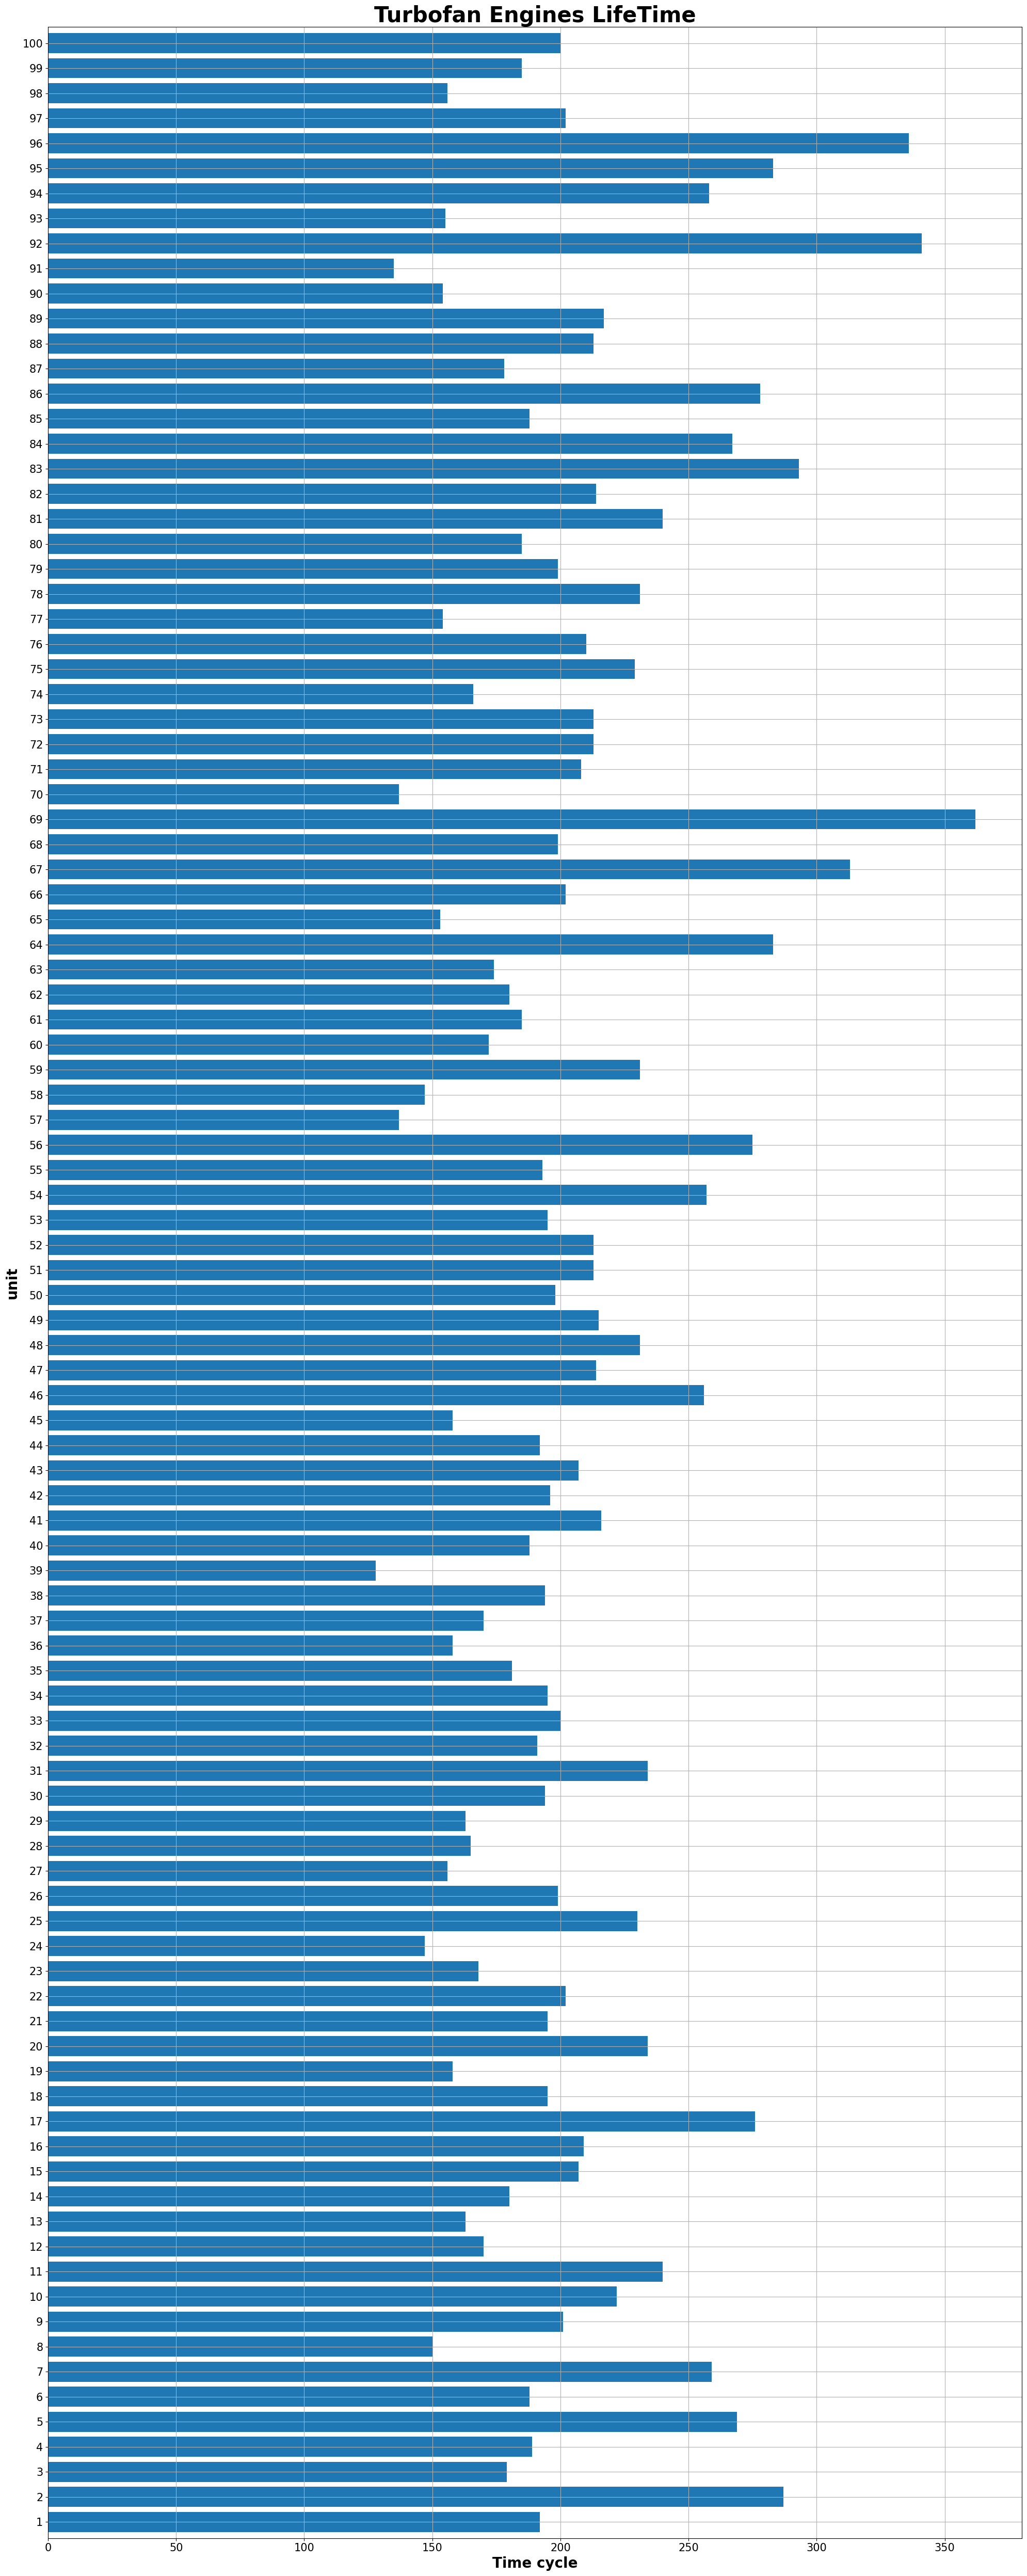

Text(0.5, 9.444444444444423, 'max time cycle')

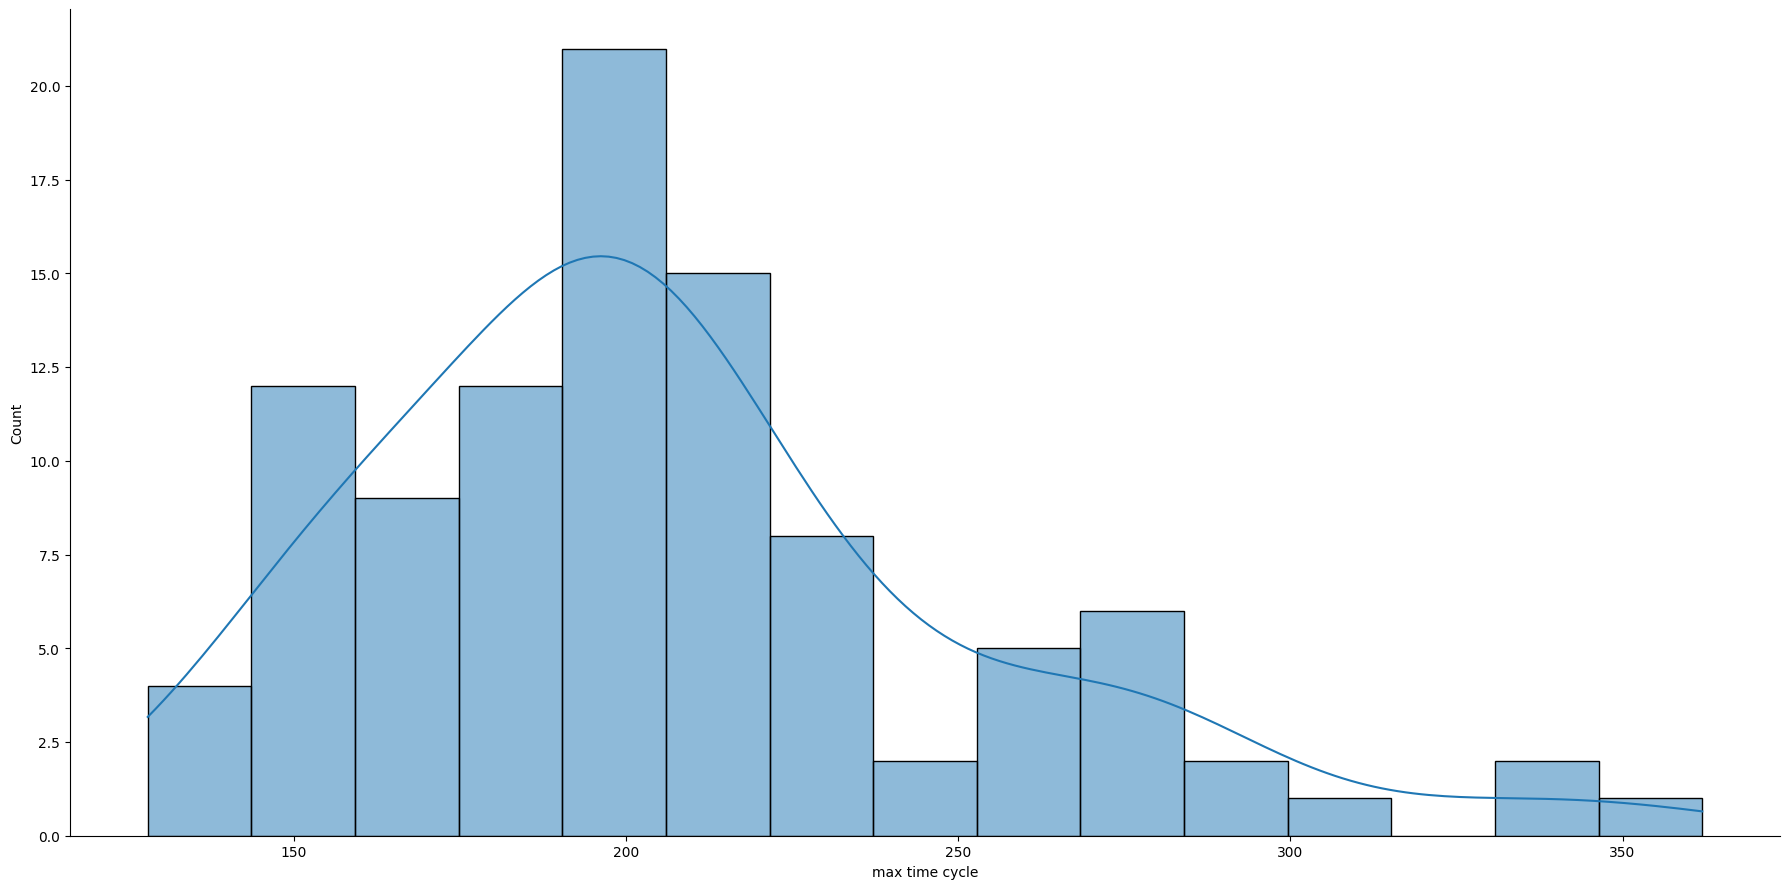

In [7]:
max_time_cycles=train_data1[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=15,height=9,aspect=2)
plt.xlabel('max time cycle')

In [7]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged
train_data1 = add_RUL_column(train_data1)
train_data2 = add_RUL_column(train_data2)
train_data3 = add_RUL_column(train_data3)
train_data4 = add_RUL_column(train_data4)

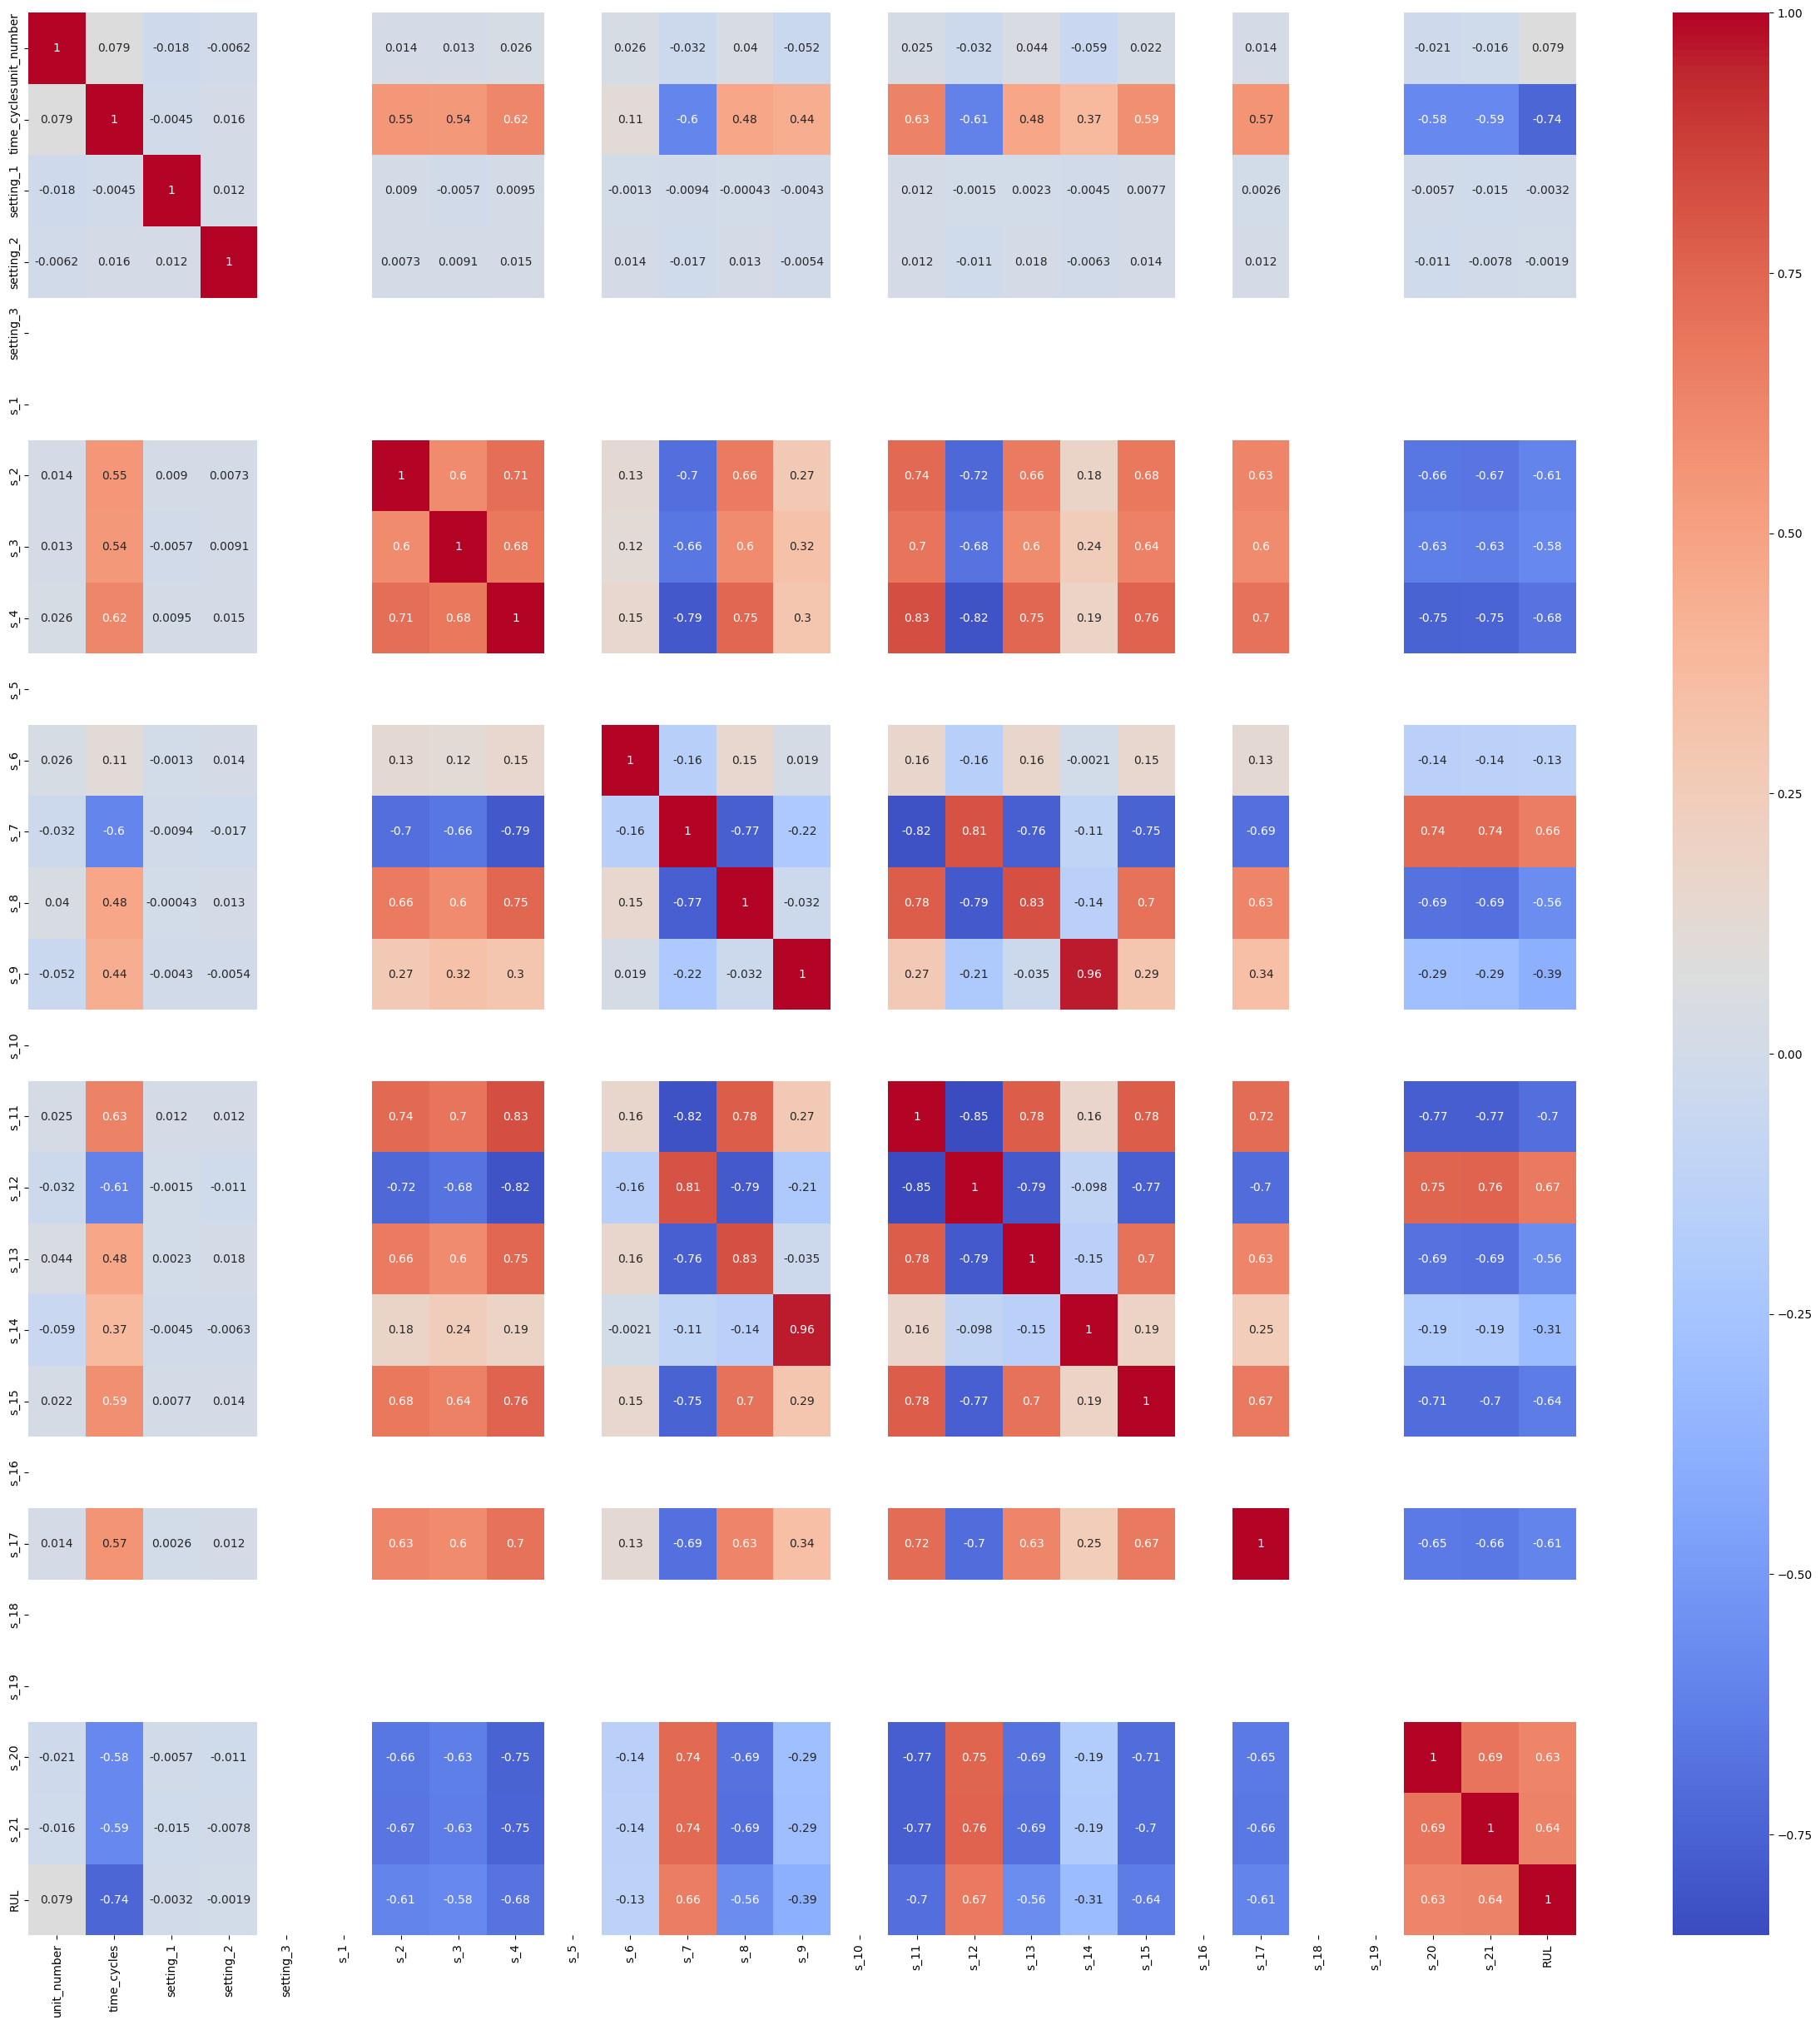

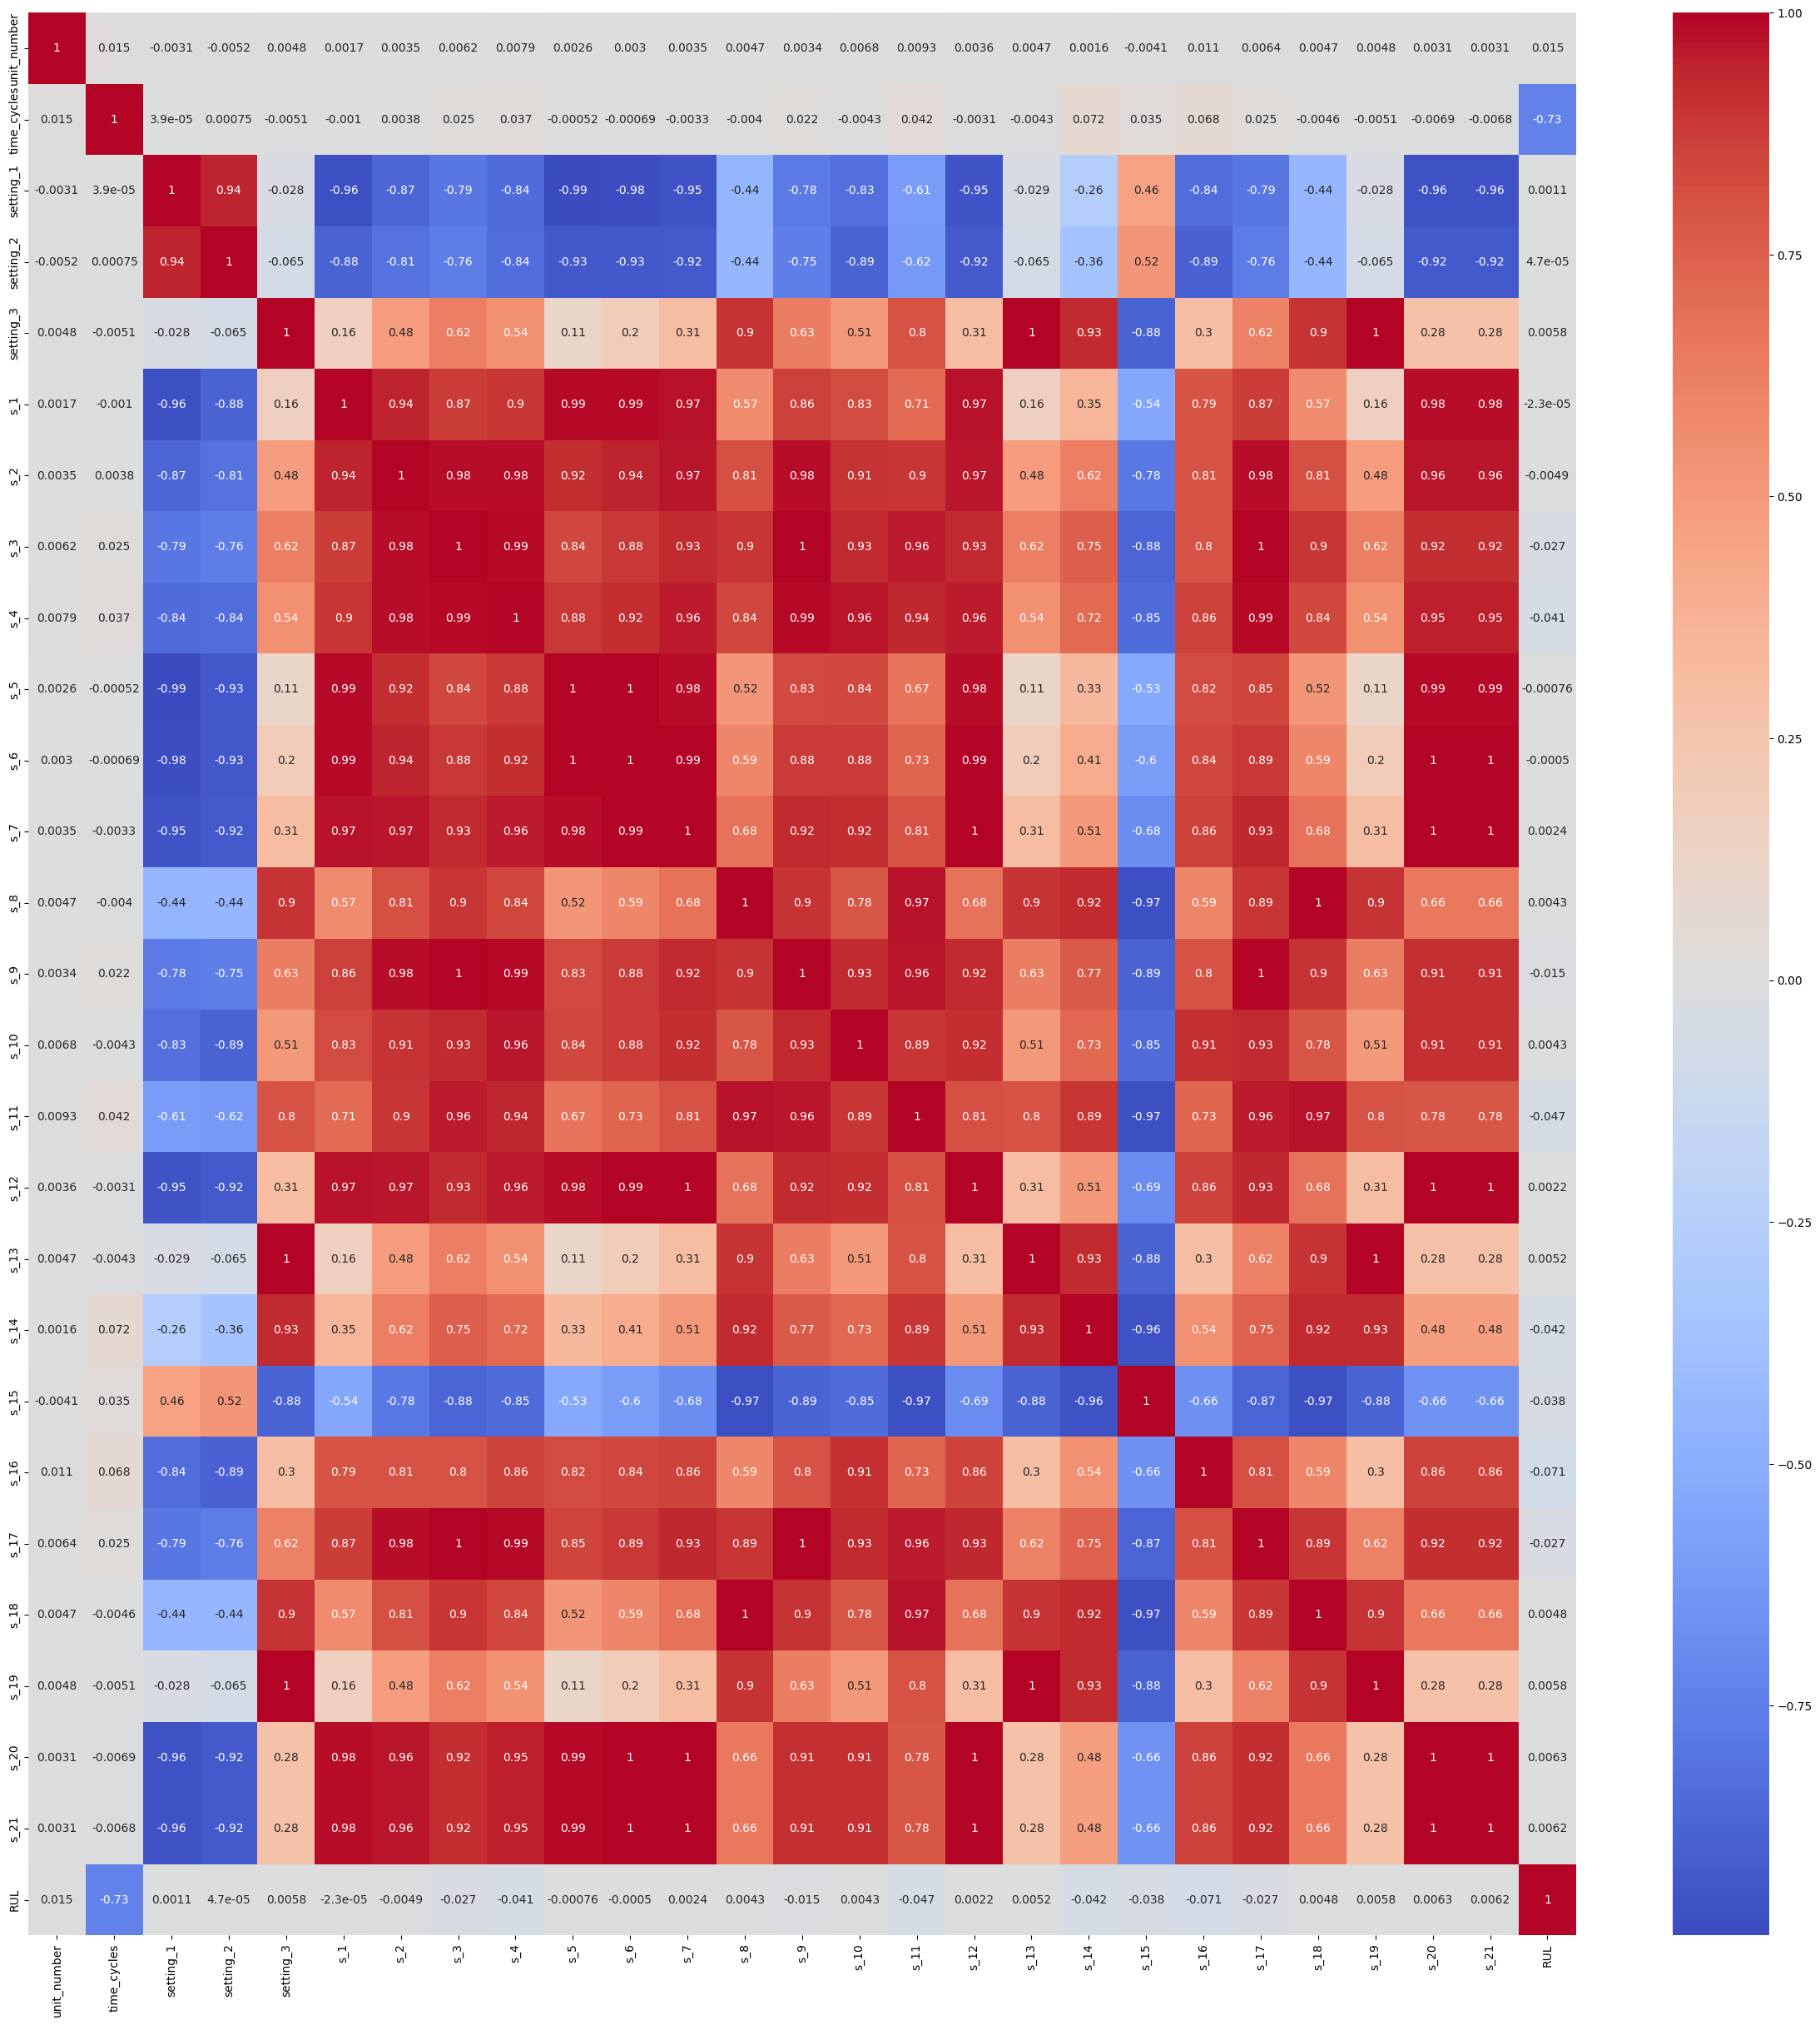

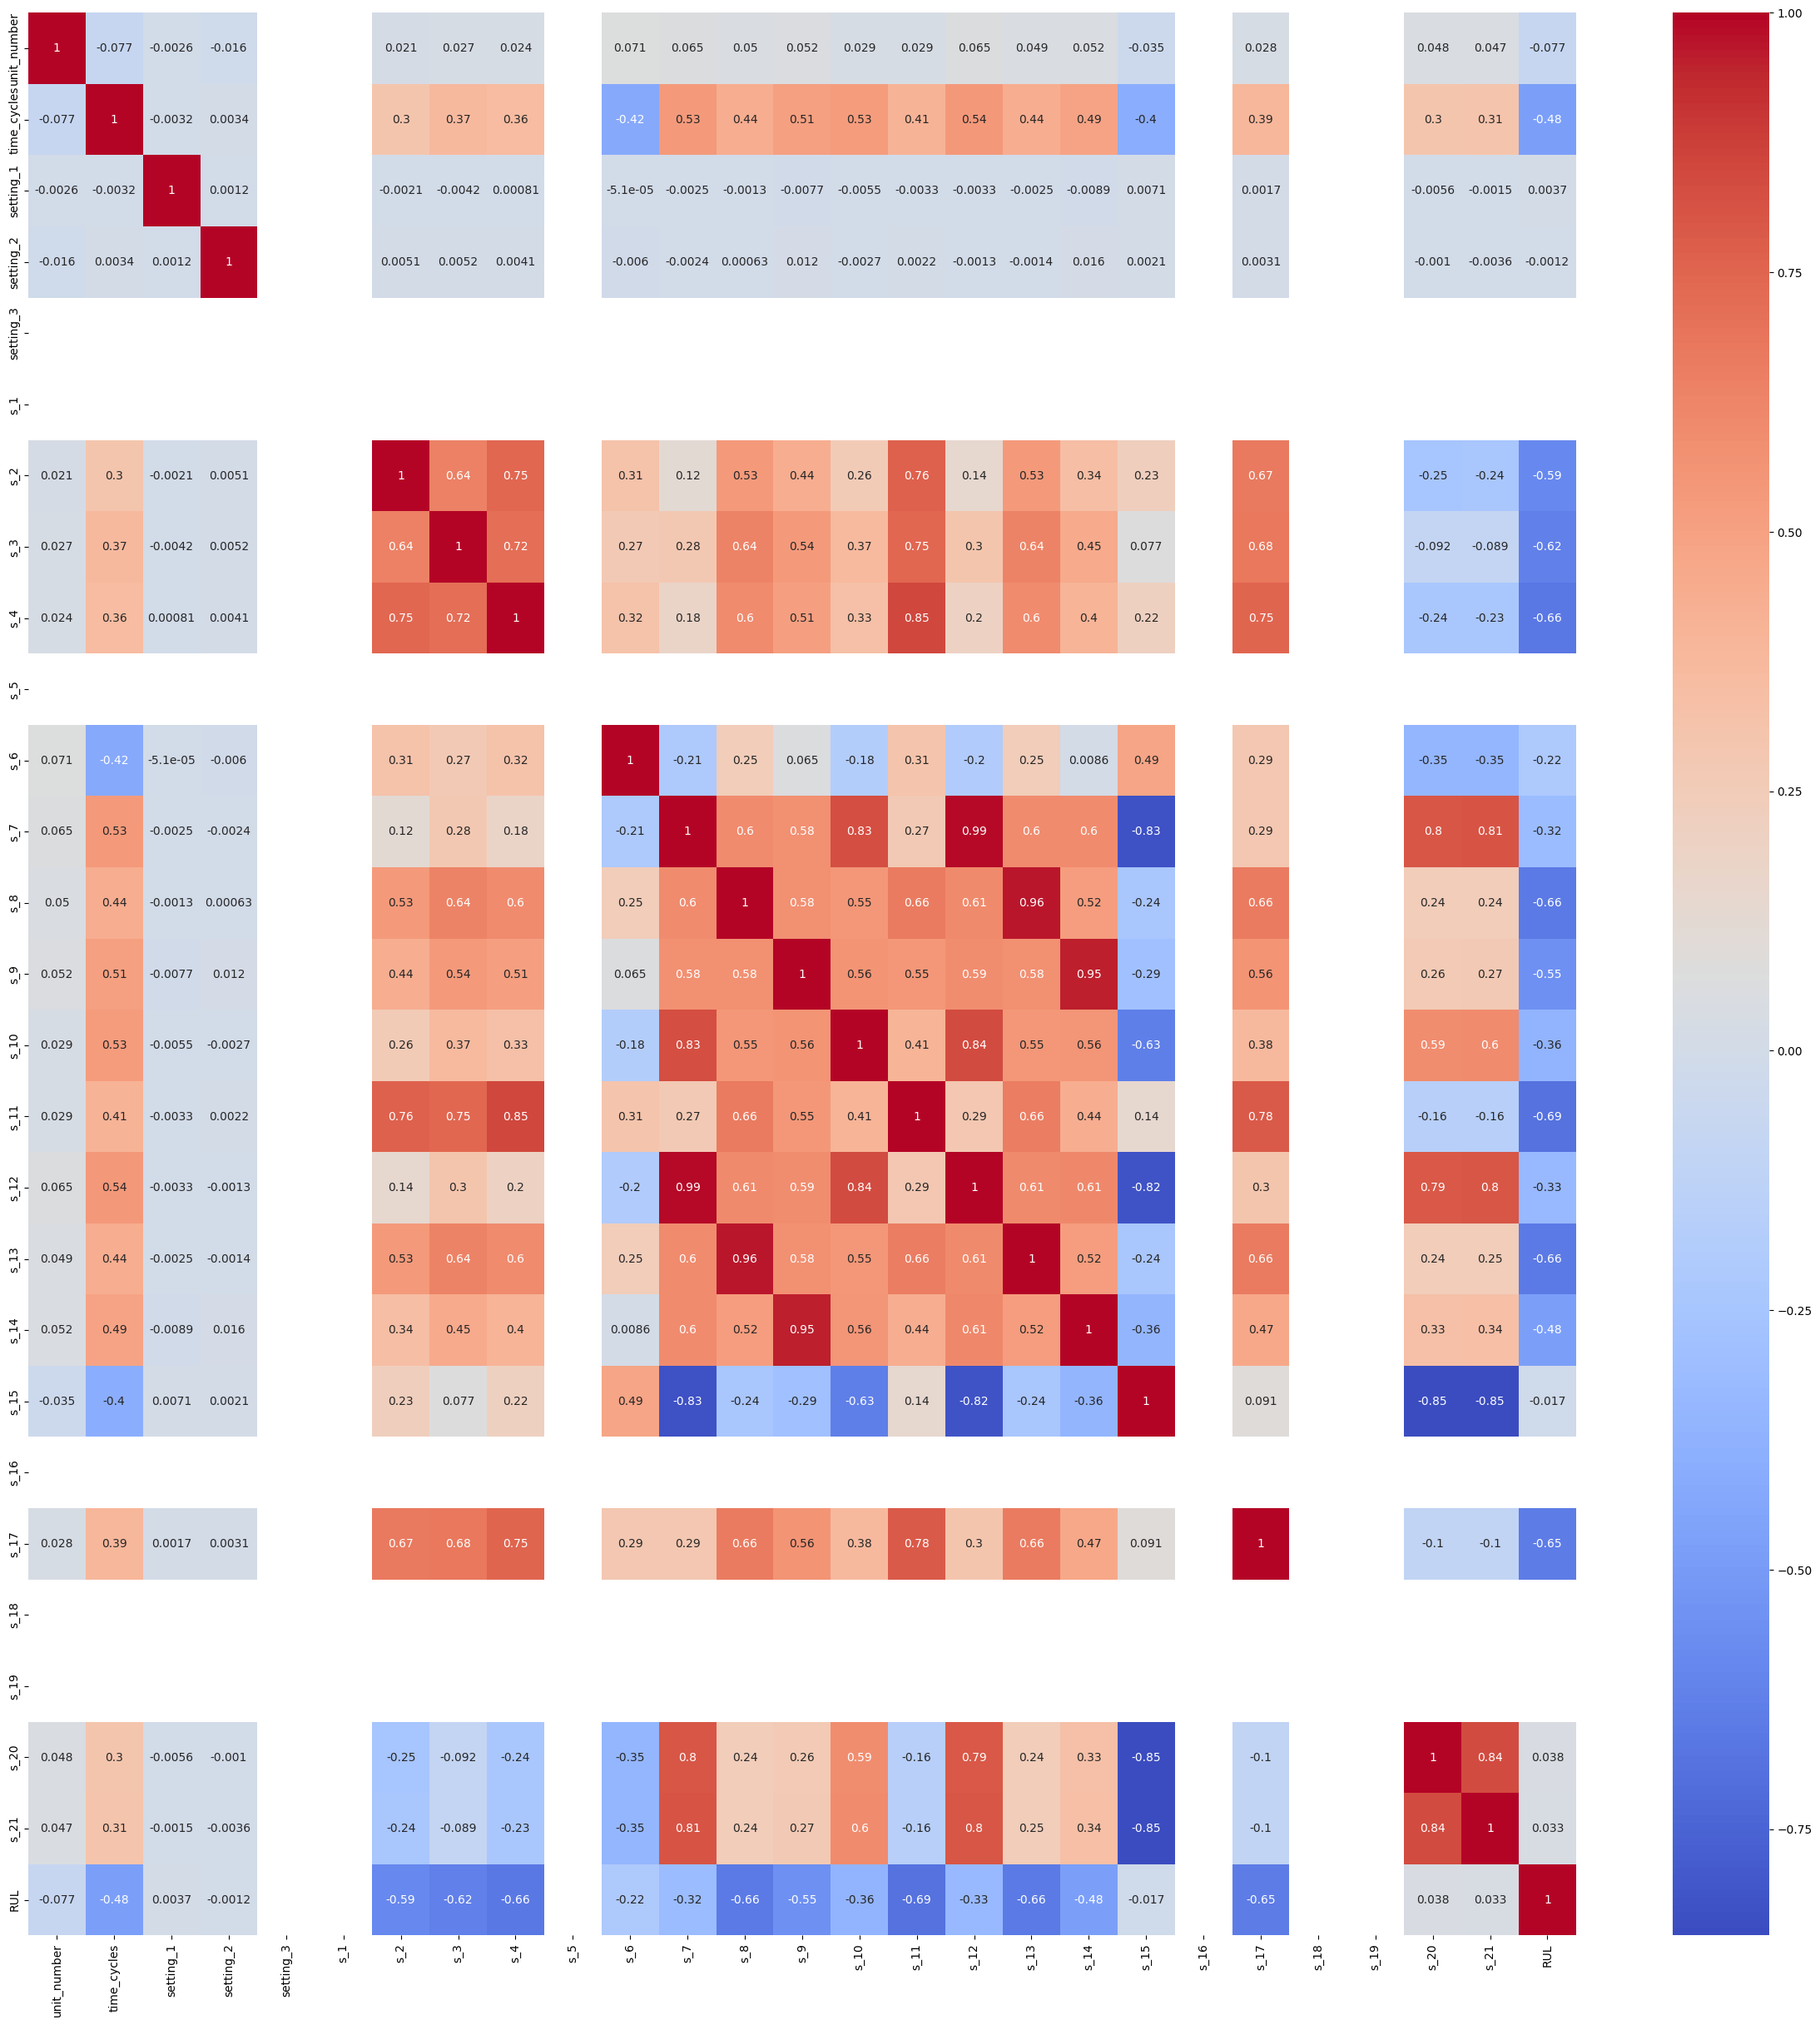

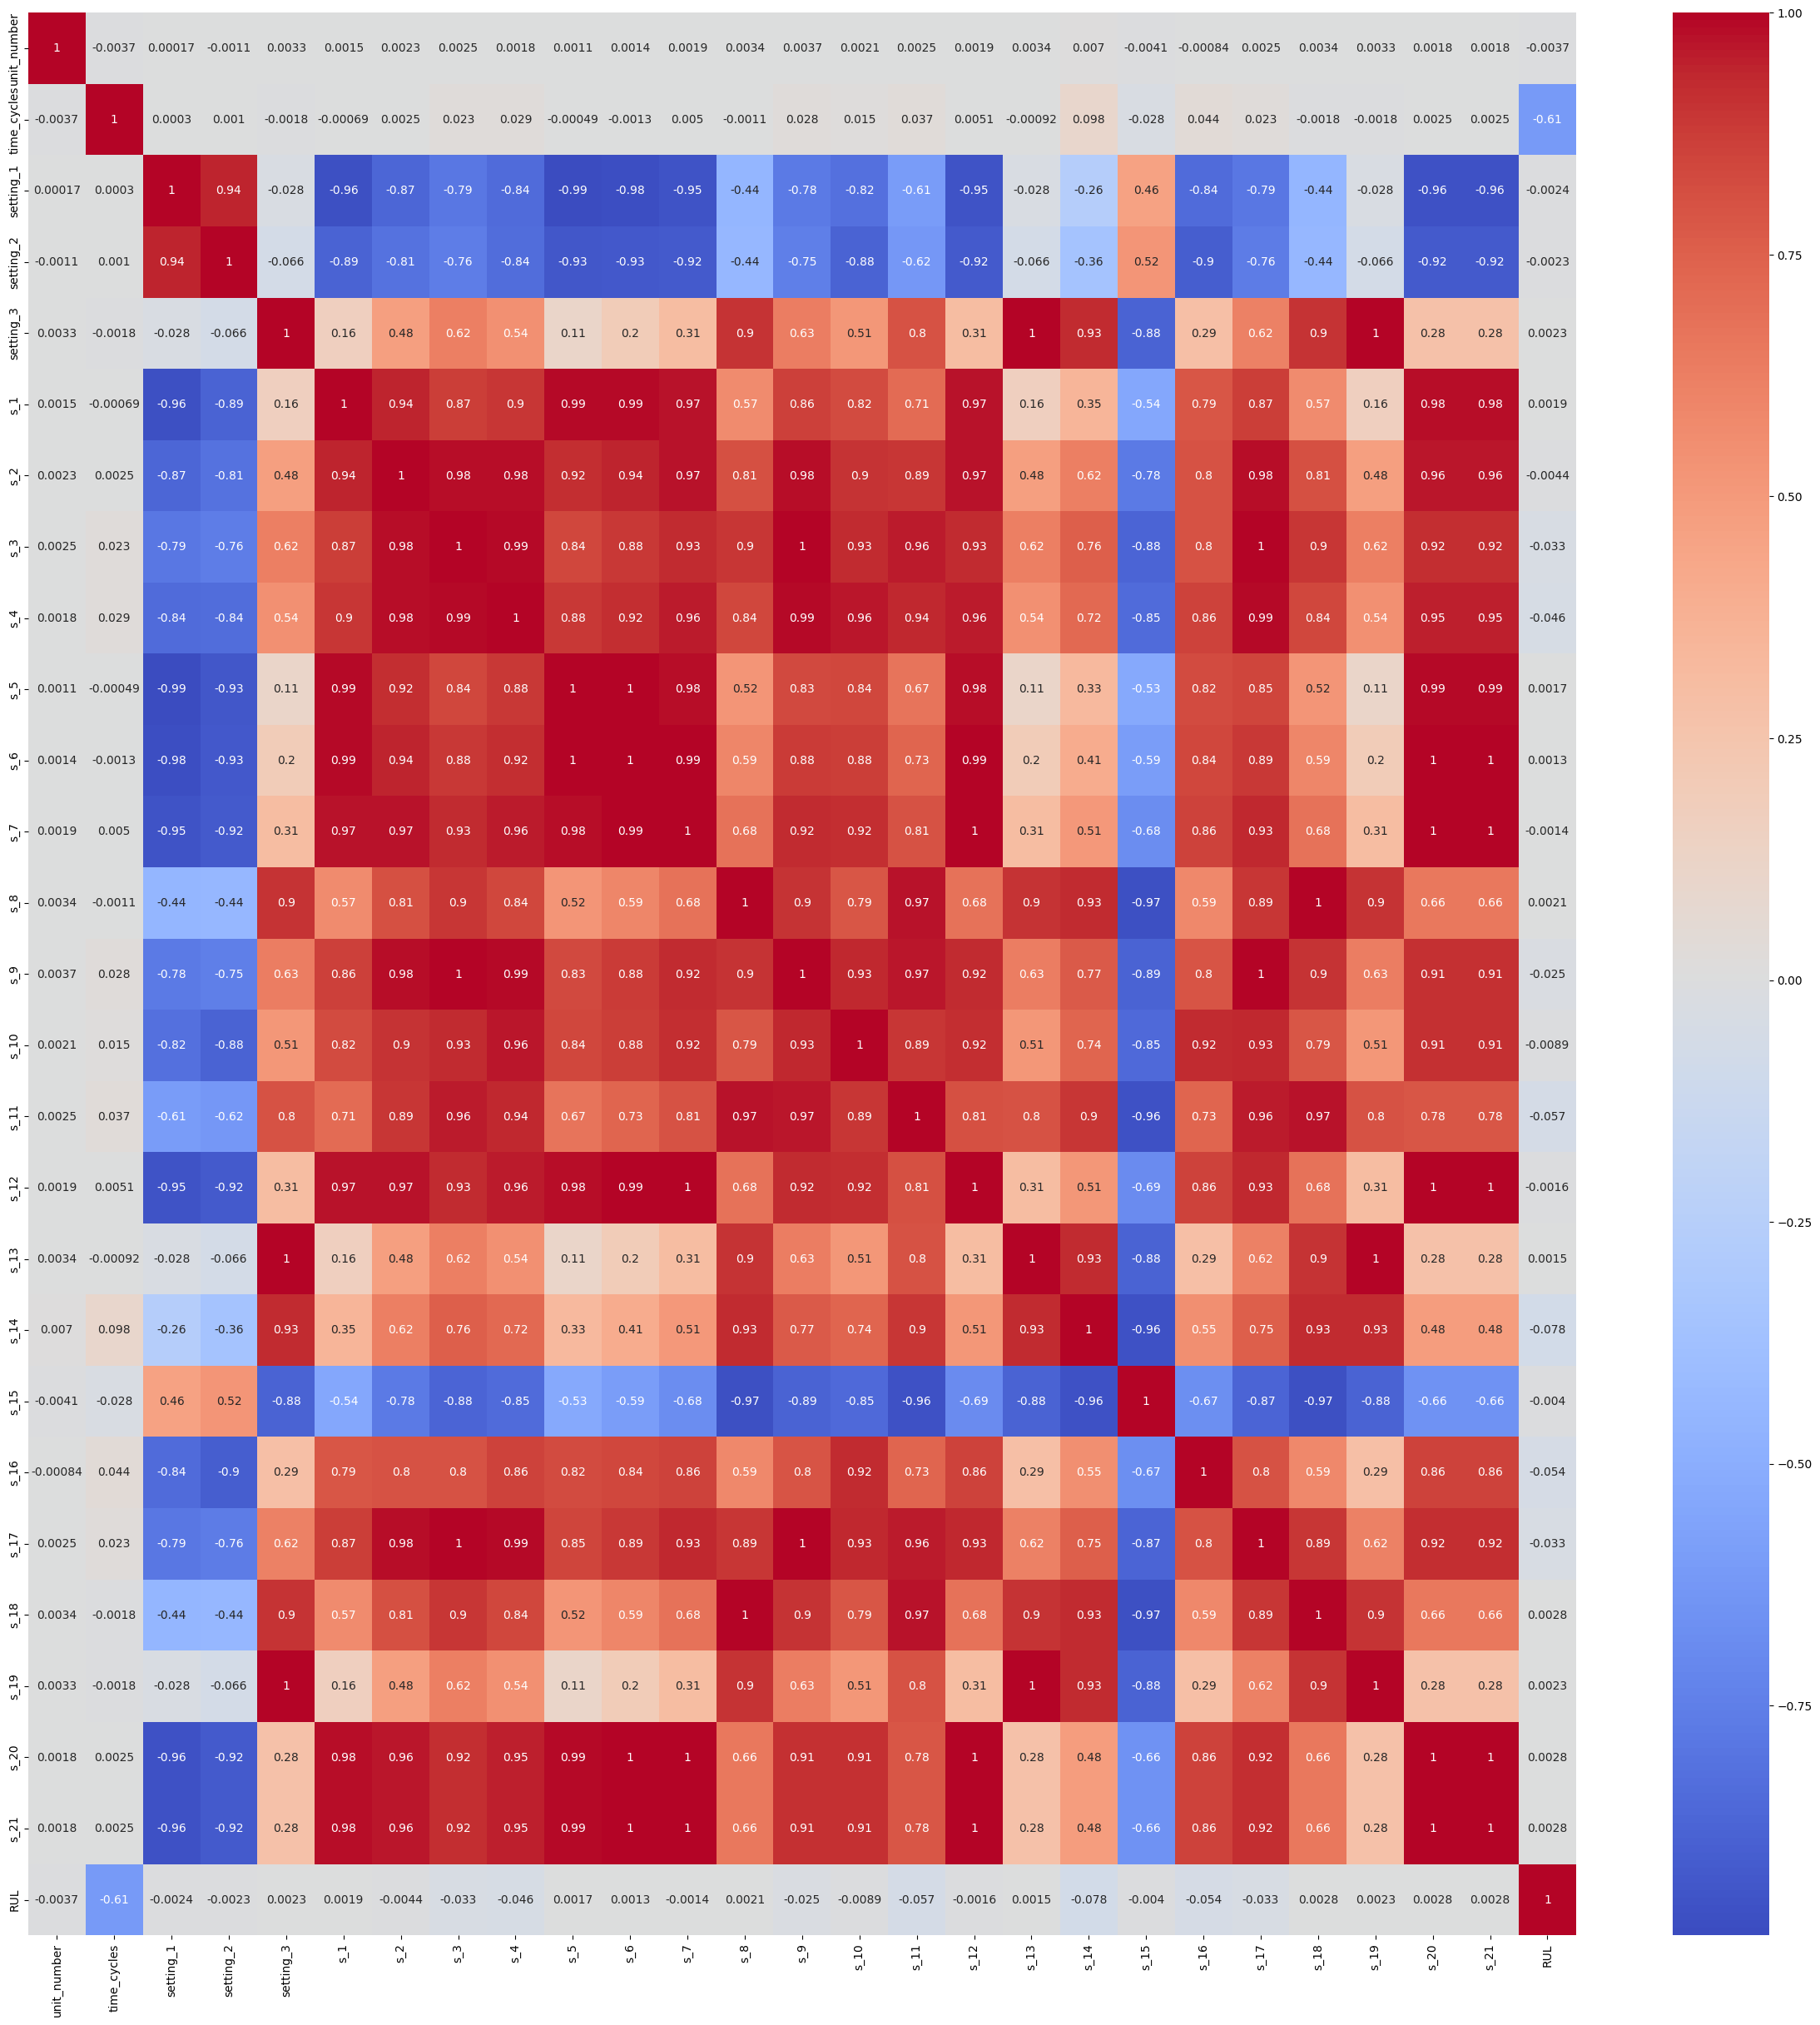

In [8]:
# finding the correlation between the features in train_data1
correlation = train_data1.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
correlation = train_data2.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
correlation = train_data3.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
correlation = train_data4.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()



# From this we can infer that the correlation changes on the type of degraation

In [9]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [11]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()
    

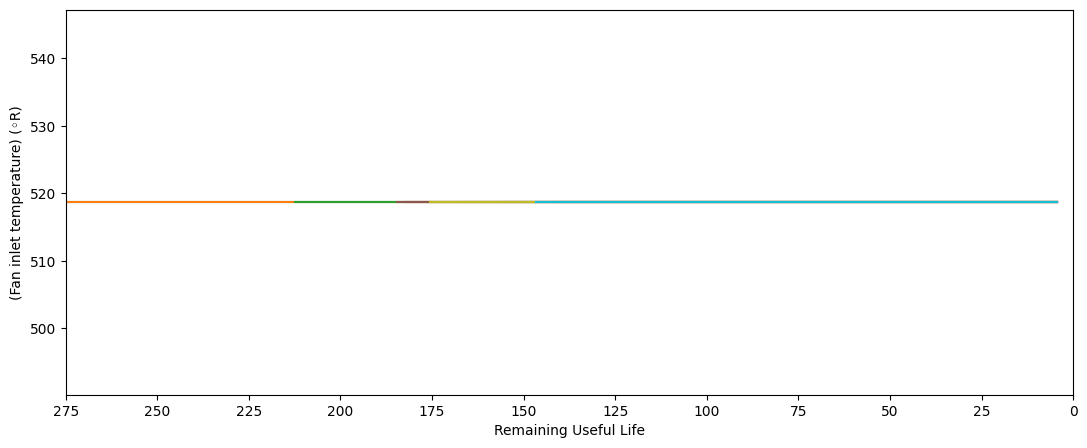

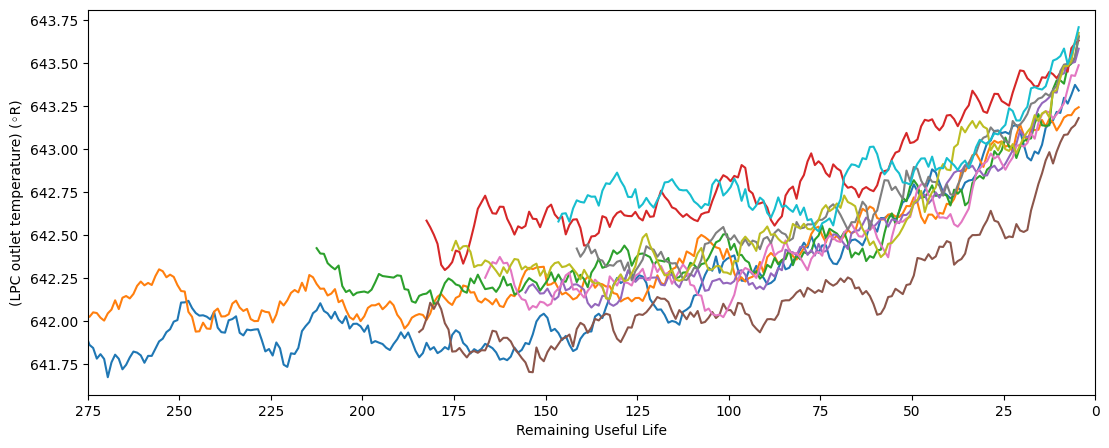

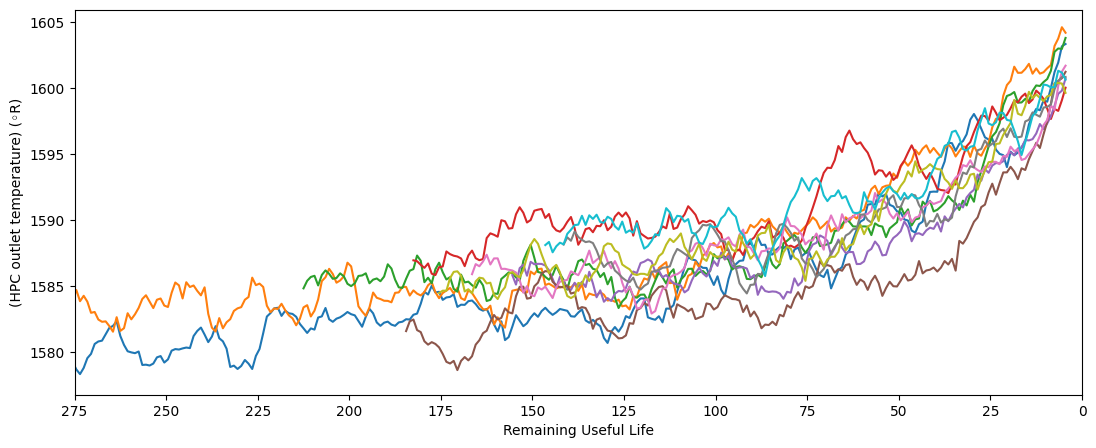

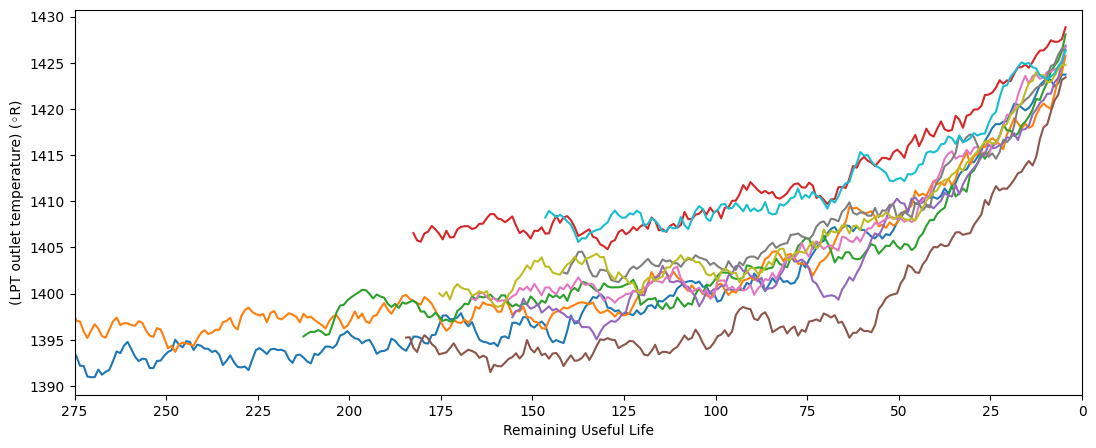

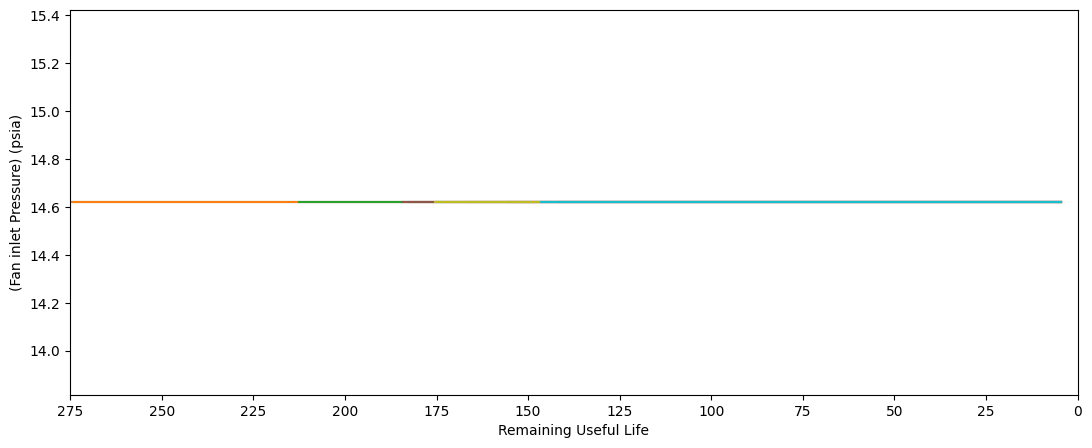

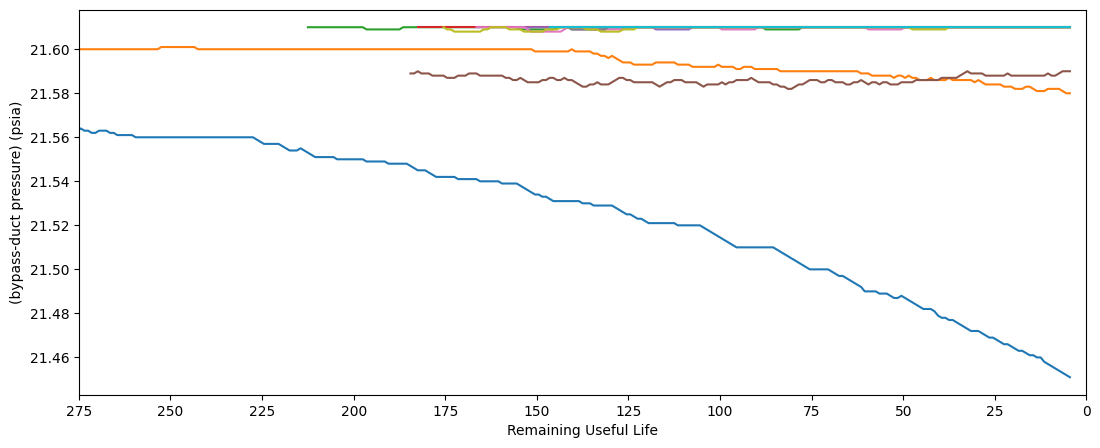

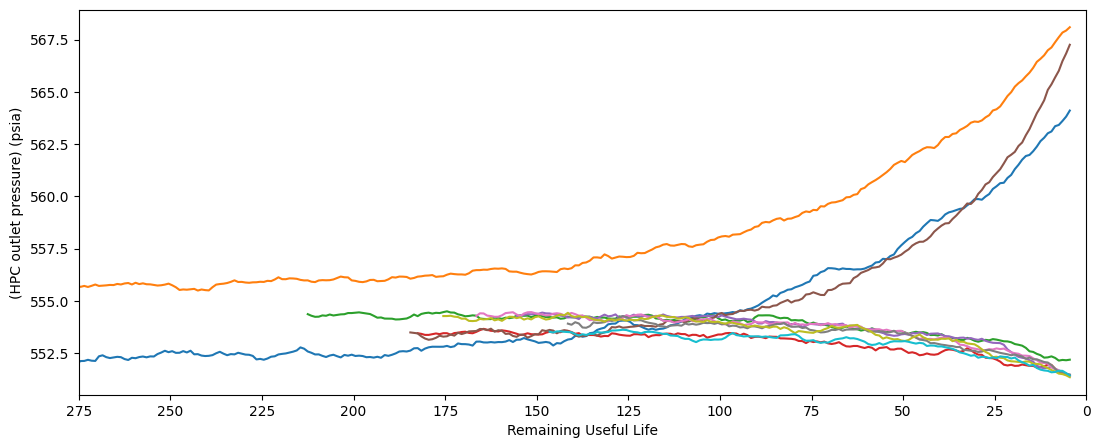

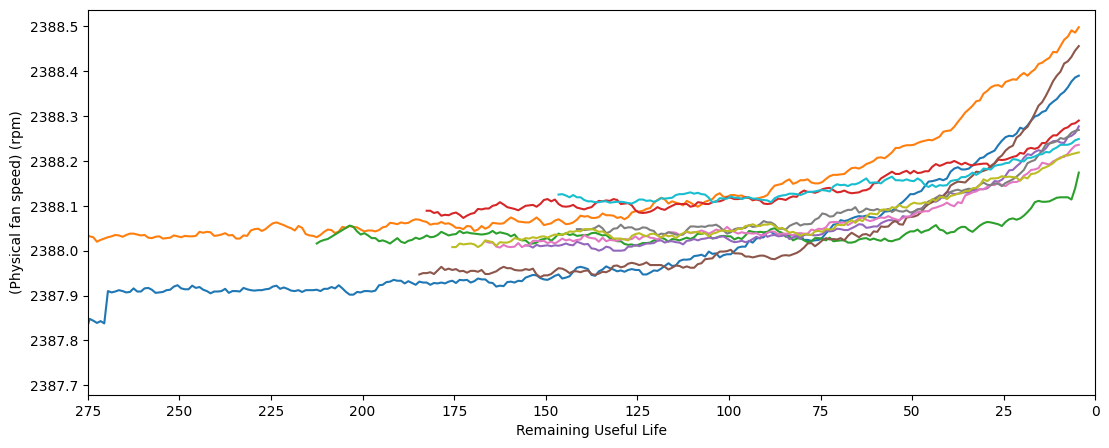

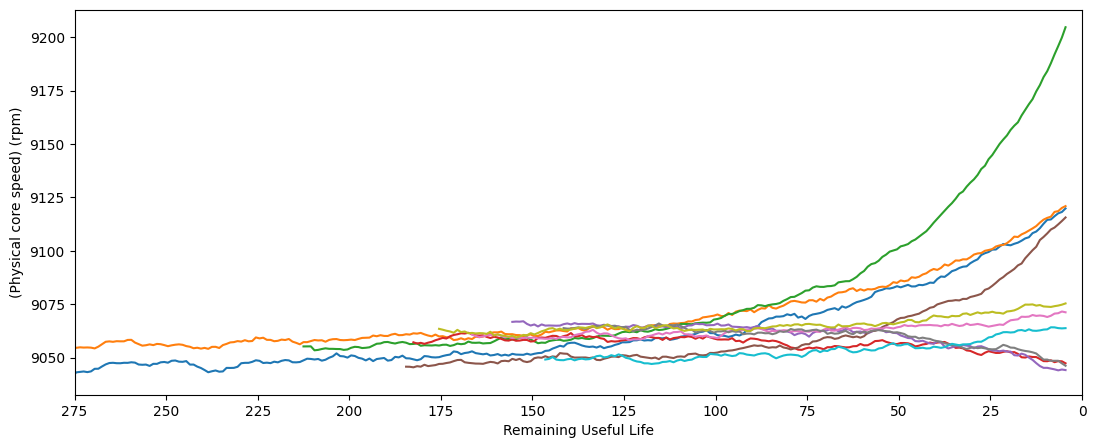

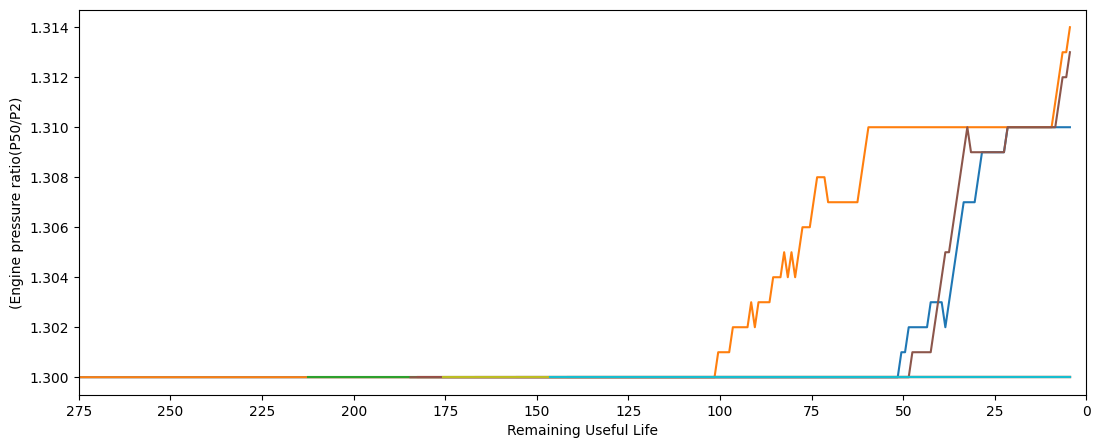

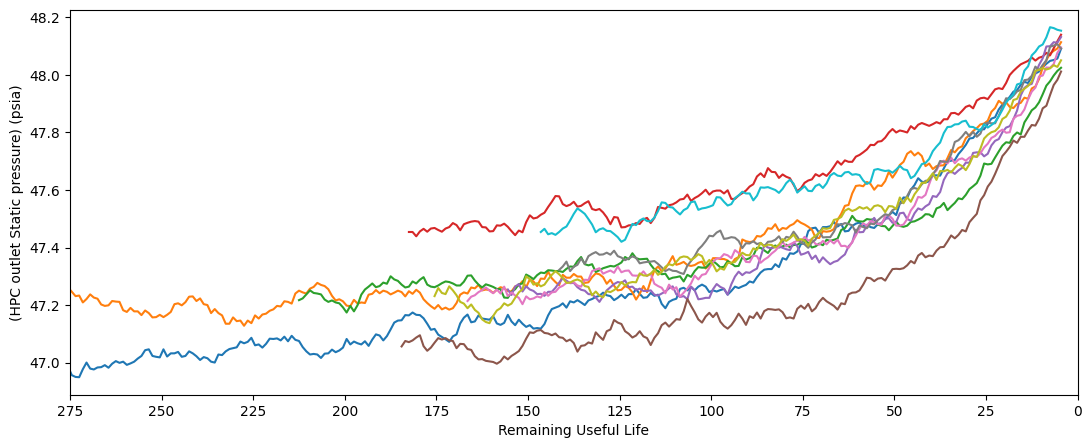

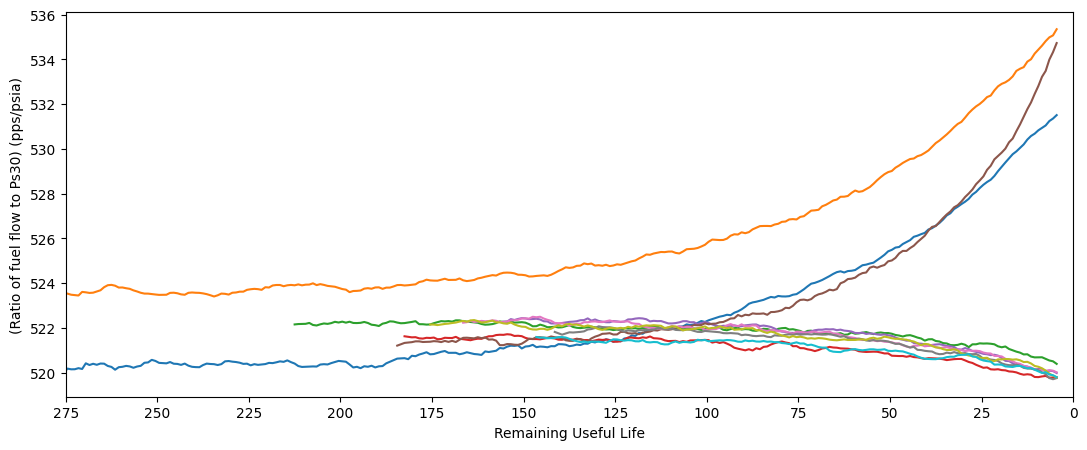

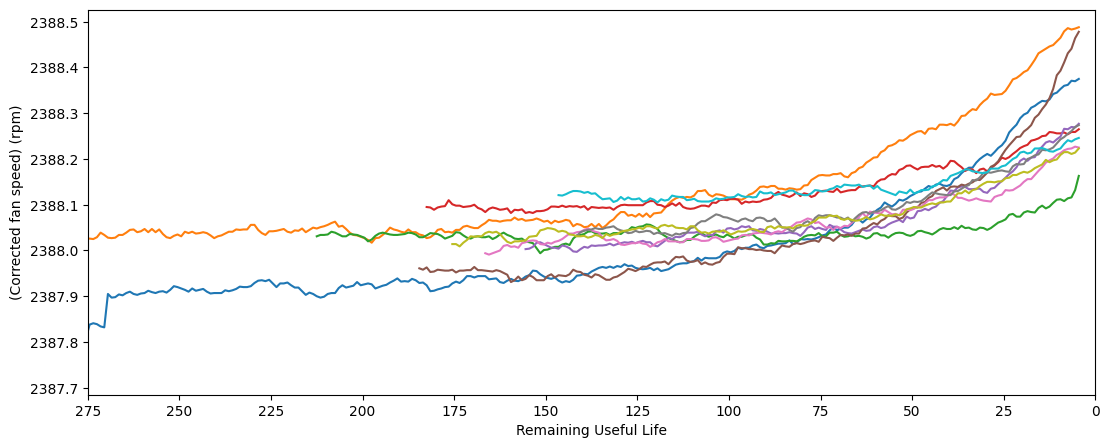

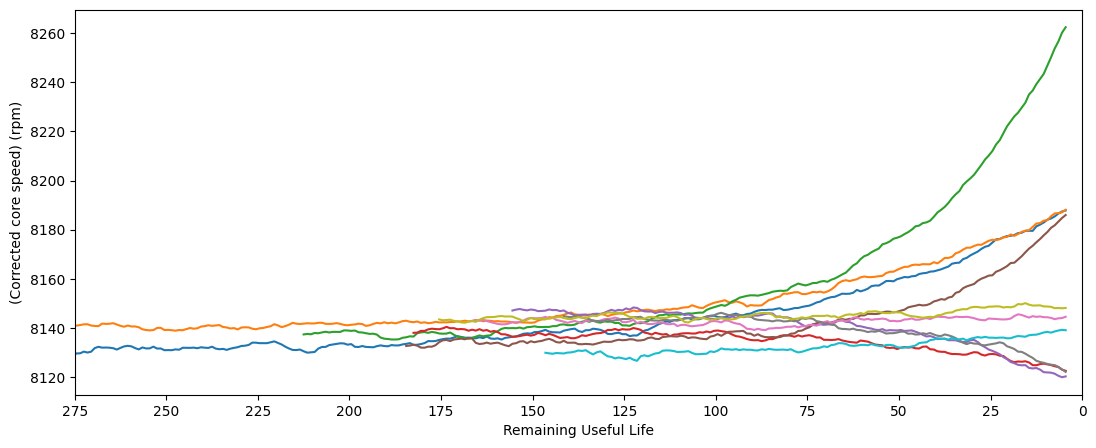

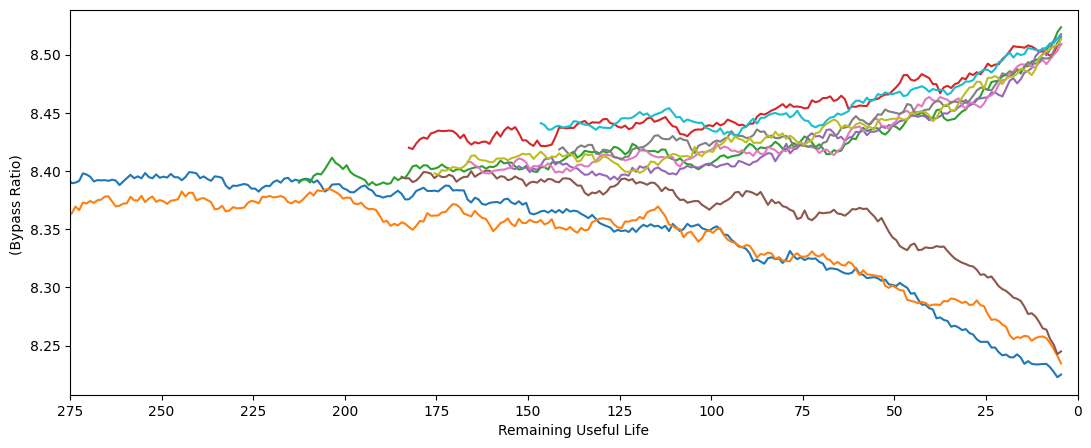

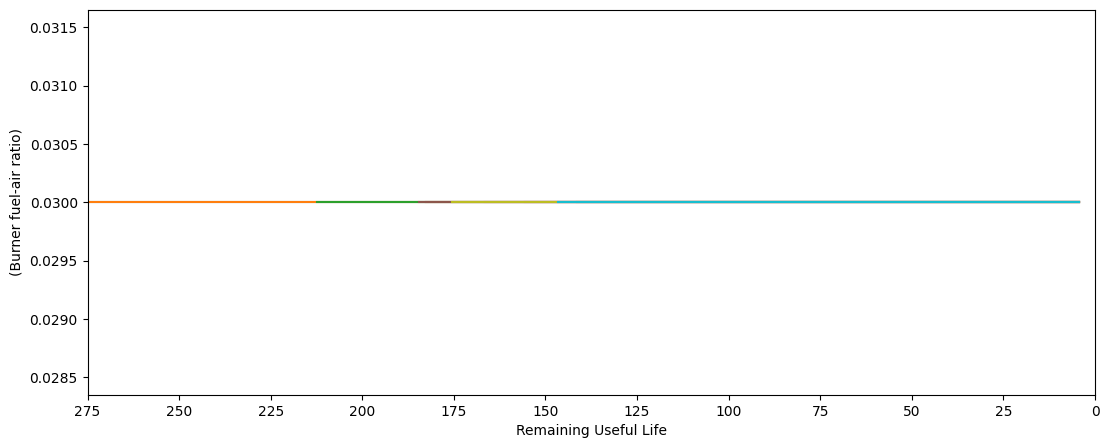

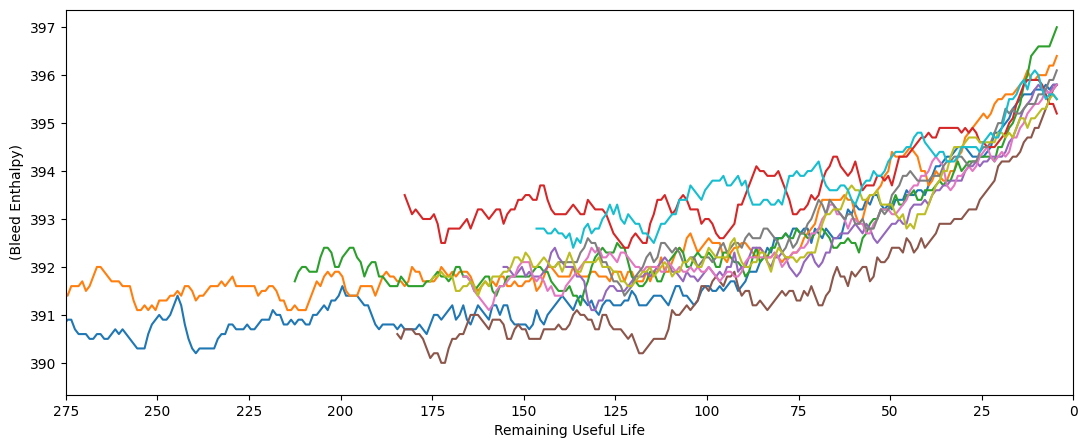

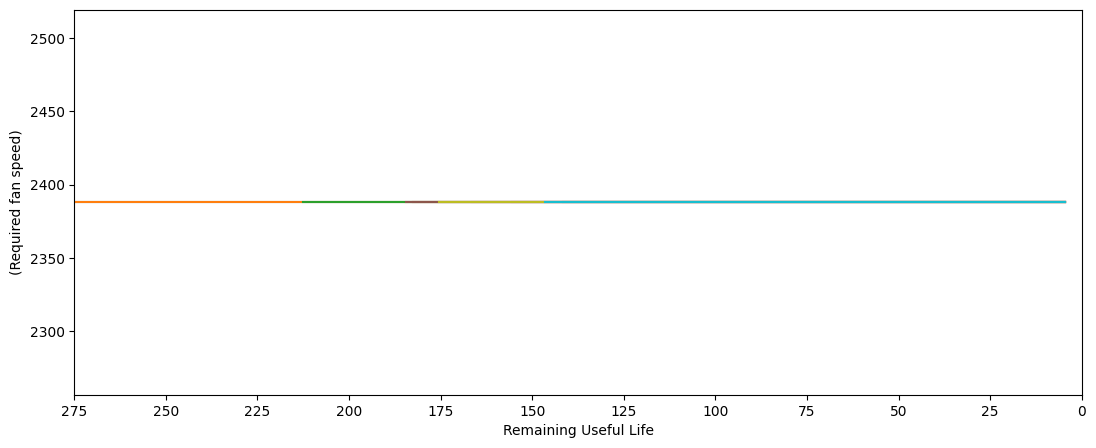

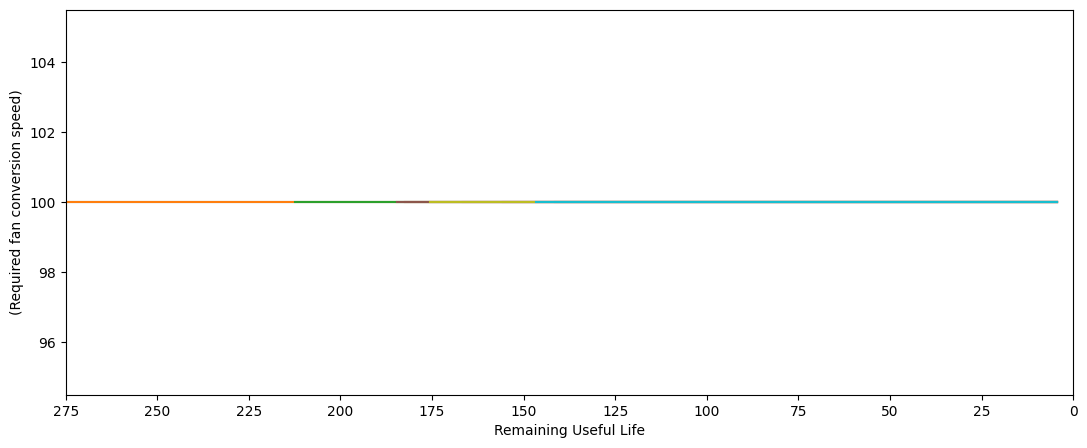

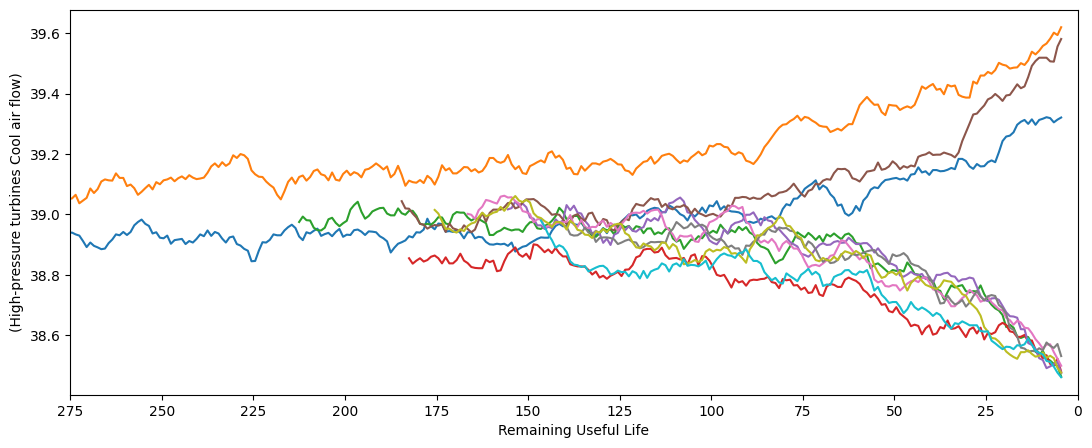

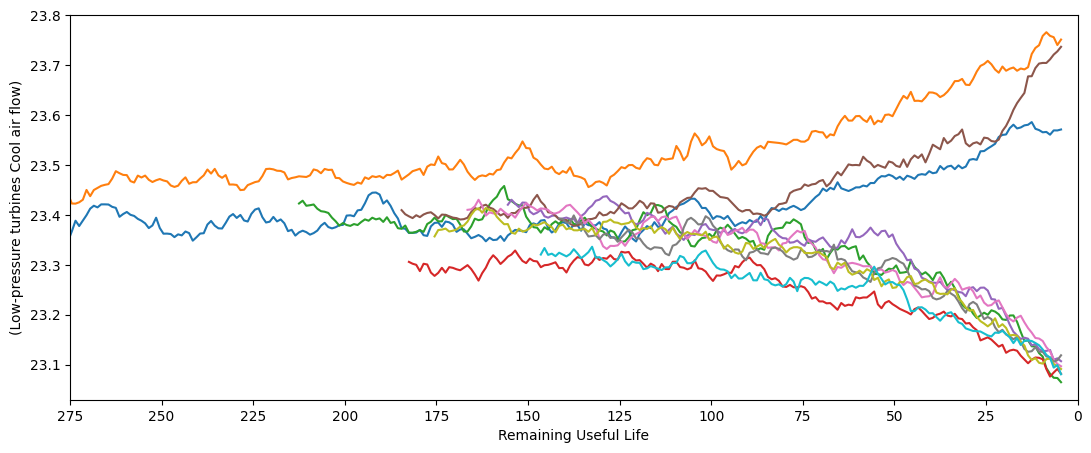

In [12]:
for i in range(1,22):
    try:
        plot_signal(train_data3, Sensor_dictionary,'s_'+str(i))
    except:
        pass

## Doing some Time Series Analysis

C:\Users\Asus\AppData\Local\Temp\ipykernel_26452\3782881879.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_data1[sensor_names])


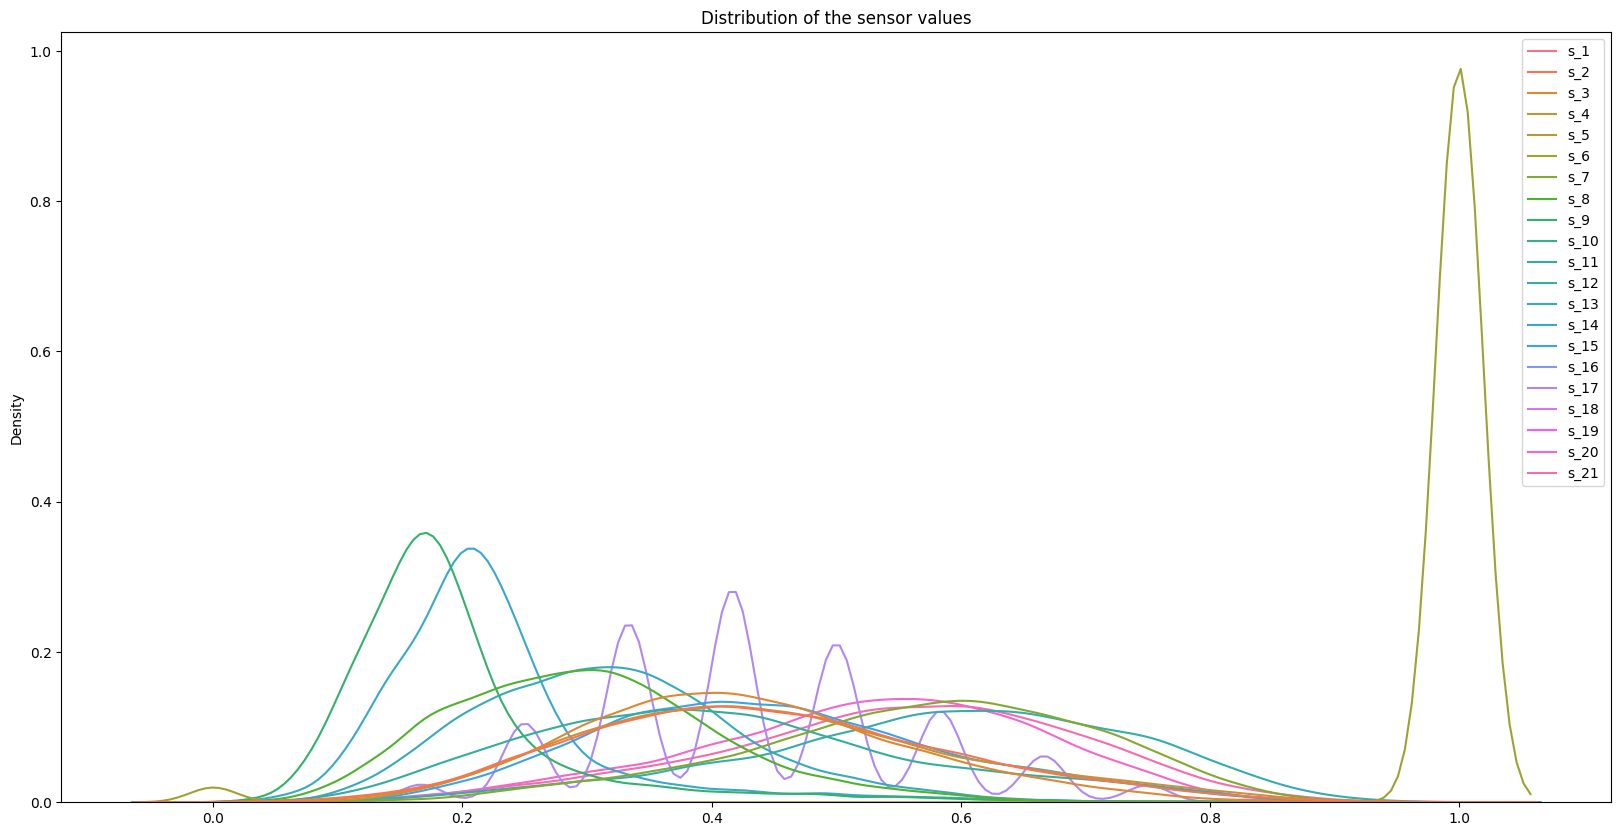

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data1[sensor_names] = scaler.fit_transform(train_data1[sensor_names])
test_data1[sensor_names] = scaler.transform(test_data1[sensor_names])
train_data2[sensor_names] = scaler.fit_transform(train_data2[sensor_names])
test_data2[sensor_names] = scaler.transform(test_data2[sensor_names])
train_data3[sensor_names] = scaler.fit_transform(train_data3[sensor_names])
test_data3[sensor_names] = scaler.transform(test_data3[sensor_names])
train_data4[sensor_names] = scaler.fit_transform(train_data4[sensor_names])
test_data4[sensor_names] = scaler.transform(test_data4[sensor_names])

# Find the distribution of the sensorvalues
plt.figure(figsize=(20, 10))
sns.kdeplot(data=train_data1[sensor_names])
plt.title('Distribution of the sensor values')
plt.show()

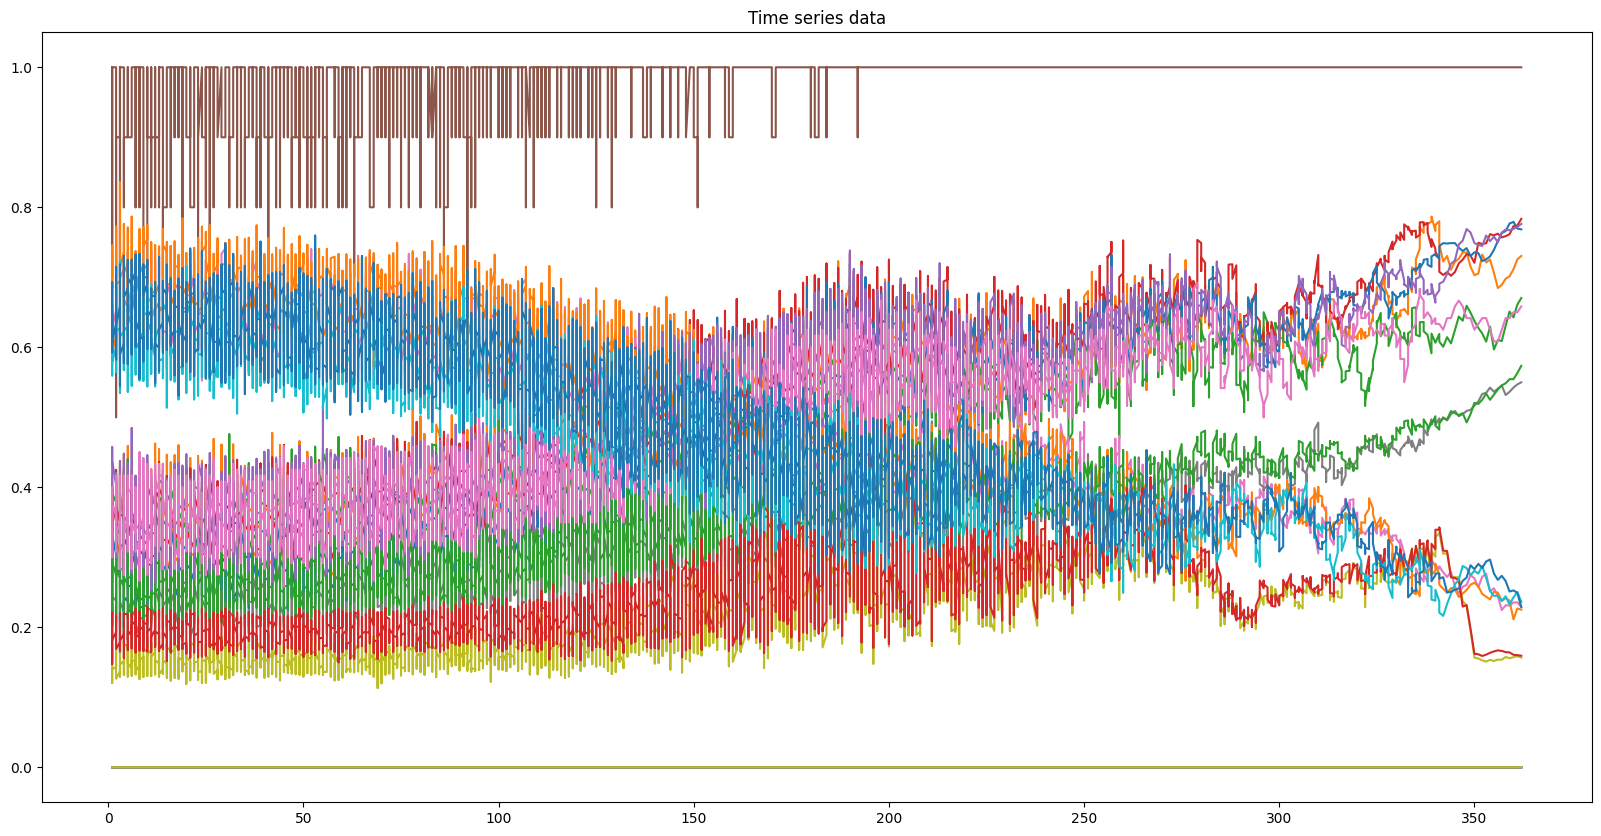

In [102]:
# Time series data preparation
def prepare_data(data, window_size):
    data = data.copy()
    data.set_index('time_cycles', inplace=True)
    data.sort_index(inplace=True)
    data = data[sensor_names]
    data = data.rolling(window=window_size).mean()
    data = data.dropna()
    return data

window_size = 10
train_data1_windowed = prepare_data(train_data1, window_size)
train_data2_windowed = prepare_data(train_data2, window_size)
train_data3_windowed = prepare_data(train_data3, window_size)
train_data4_windowed = prepare_data(train_data4, window_size)

# Plot the time series data
plt.figure(figsize=(20, 10))
plt.plot(train_data1_windowed)
plt.title('Time series data')
plt.show()




# PCA

In [14]:
# Performing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
train_data1_pca = pca.fit_transform(train_data1[sensor_names])
test_data1_pca = pca.transform(test_data1[sensor_names])
train_data2_pca = pca.fit_transform(train_data2[sensor_names])
test_data2_pca = pca.transform(test_data2[sensor_names])
train_data3_pca = pca.fit_transform(train_data3[sensor_names])
test_data3_pca = pca.transform(test_data3[sensor_names])
train_data4_pca = pca.fit_transform(train_data4[sensor_names])
test_data4_pca = pca.transform(test_data4[sensor_names])

# Creating a new dataframe with the PCA features
train_data1_pca = pd.DataFrame(train_data1_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
test_data1_pca = pd.DataFrame(test_data1_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
train_data2_pca = pd.DataFrame(train_data2_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
test_data2_pca = pd.DataFrame(test_data2_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
train_data3_pca = pd.DataFrame(train_data3_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
test_data3_pca = pd.DataFrame(test_data3_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
train_data4_pca = pd.DataFrame(train_data4_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
test_data4_pca = pd.DataFrame(test_data4_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])

# Adding the PCA features to the original dataframes
train_data1_new = pd.concat([train_data1, train_data1_pca], axis=1)
test_data1_new = pd.concat([test_data1, test_data1_pca], axis=1)
train_data2_new = pd.concat([train_data2, train_data2_pca], axis=1)
test_data2_new = pd.concat([test_data2, test_data2_pca], axis=1)
train_data3_new = pd.concat([train_data3, train_data3_pca], axis=1)
test_data3_new = pd.concat([test_data3, test_data3_pca], axis=1)
train_data4_new = pd.concat([train_data4, train_data4_pca], axis=1)
test_data4_new = pd.concat([test_data4, test_data4_pca], axis=1)


In [12]:
train_data1_new.head()

unit_number  time_cycles  setting_1  setting_2  setting_3  s_1       s_2  \
0            1            1    -0.0007    -0.0004      100.0  0.0  0.183735   
1            1            2     0.0019    -0.0003      100.0  0.0  0.283133   
2            1            3    -0.0043     0.0003      100.0  0.0  0.343373   
3            1            4     0.0007     0.0000      100.0  0.0  0.343373   
4            1            5    -0.0019    -0.0002      100.0  0.0  0.349398   

        s_3       s_4  s_5  ...      PCA1      PCA2      PCA3      PCA4  \
0  0.406802  0.309757  0.0  ... -0.406219 -0.059468  0.030828 -0.150033   
1  0.453019  0.352633  0.0  ... -0.331362 -0.079217  0.020955 -0.086594   
2  0.369523  0.370527  0.0  ... -0.417904 -0.060337  0.029236  0.006560   
3  0.256159  0.331195  0.0  ... -0.517427 -0.087438  0.028658  0.059643   
4  0.257467  0.404625  0.0  ... -0.343519 -0.042387  0.032985  0.029827   

       PCA5      PCA6      PCA7      PCA8      PCA9     PCA10  
0  0.061974  0.043500  0.038953  0.066002  0.060150 -0.017874  
1  0.111301  0.069673  0.011817  0.068651  0.007843 -0.005294  
2  0.061528 -0.074959 -0.143411  0.057252  0.002872  0.070693  
3 -0.028217 -0.043397 -0.011954 -0.165901 -0.041547  0.097414  
4 -0.079283  0.093723  0.030206  0.005806 -0.026397  0.070642  

[5 rows x 37 columns]

In [13]:
# print all the column names of train data
train_data1_new.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6',
       'PCA7', 'PCA8', 'PCA9', 'PCA10'],
      dtype='object')

In [105]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(data, target, k):
    fs = SelectKBest(score_func=f_regression, k=k)
    fs.fit(data, target)
    data = fs.transform(data)
    return data

# Selecting the top 10 features
train_data1_selected = select_features(train_data1_new, train_data1_new['RUL'], 10)
train_data2_selected = select_features(train_data2_new, train_data2_new['RUL'], 10)
train_data3_selected = select_features(train_data3_new, train_data3_new['RUL'], 10)
train_data4_selected = select_features(train_data4_new, train_data4_new['RUL'], 10)
# use the selected features in the test  data



In [17]:
# Show the selected features
train_data1_new = pd.DataFrame(train_data1_new)
train_data2_new = pd.DataFrame(train_data2_new)
train_data3_new = pd.DataFrame(train_data3_new)
train_data4_new = pd.DataFrame(train_data4_new)
train_data1_new.head()

unit_number  time_cycles  setting_1  setting_2  setting_3  s_1       s_2  \
0            1            1    -0.0007    -0.0004      100.0  0.0  0.183735   
1            1            2     0.0019    -0.0003      100.0  0.0  0.283133   
2            1            3    -0.0043     0.0003      100.0  0.0  0.343373   
3            1            4     0.0007     0.0000      100.0  0.0  0.343373   
4            1            5    -0.0019    -0.0002      100.0  0.0  0.349398   

        s_3       s_4  s_5  ...      PCA1      PCA2      PCA3      PCA4  \
0  0.406802  0.309757  0.0  ... -0.406219 -0.059468  0.030828 -0.150033   
1  0.453019  0.352633  0.0  ... -0.331362 -0.079217  0.020955 -0.086594   
2  0.369523  0.370527  0.0  ... -0.417904 -0.060337  0.029236  0.006560   
3  0.256159  0.331195  0.0  ... -0.517427 -0.087438  0.028658  0.059643   
4  0.257467  0.404625  0.0  ... -0.343519 -0.042387  0.032985  0.029827   

       PCA5      PCA6      PCA7      PCA8      PCA9     PCA10  
0  0.061974  0.043500  0.038953  0.066002  0.060150 -0.017874  
1  0.111301  0.069673  0.011817  0.068651  0.007843 -0.005294  
2  0.061528 -0.074959 -0.143411  0.057252  0.002872  0.070693  
3 -0.028217 -0.043397 -0.011954 -0.165901 -0.041547  0.097414  
4 -0.079283  0.093723  0.030206  0.005806 -0.026397  0.070642  

[5 rows x 37 columns]

In [27]:
test_data1_new = pd.DataFrame(test_data1_new)
test_data2_new = pd.DataFrame(test_data2_new)
test_data3_new = pd.DataFrame(test_data3_new)
test_data4_new = pd.DataFrame(test_data4_new)
# print the dimensions of the data
print(train_data1_new.shape, test_data1_new.shape)
print(true_rul1.shape)

(20631, 37) (13096, 36)
(100, 2)


In [15]:
# augment the test data with the RUL values
def add_RUL_column(df, true_RUL_values):
    df = df.copy()
    df.groupby('unit_number').max()
    df['RUL'] = 0
    
test_data1_new = add_RUL_column(test_data1_new)
test_data2_new = add_RUL_column(test_data2_new)

TypeError: add_RUL_column() missing 1 required positional argument: 'true_RUL_values'

In [16]:
def add_RUL_column_test(df, true_RUL_values):
    df = df.copy()
    df['RUL'] = 0
    for i in df['unit_number'].unique():
        df.loc[df['unit_number'] == i, 'RUL'] = true_RUL_values.loc[i-1, 'RUL'] - df.loc[df['unit_number'] == i, 'time_cycles']
    return df

In [17]:
test_data1_ = add_RUL_column_test(test_data1_new, true_rul1)
test_data1_.head()

unit_number  time_cycles  setting_1  setting_2  setting_3  s_1       s_2  \
0            1            1     0.0023     0.0003      100.0  0.0  0.545181   
1            1            2    -0.0027    -0.0003      100.0  0.0  0.150602   
2            1            3     0.0003     0.0001      100.0  0.0  0.376506   
3            1            4     0.0042     0.0000      100.0  0.0  0.370482   
4            1            5     0.0014     0.0000      100.0  0.0  0.391566   

        s_3       s_4  s_5  ...      PCA2      PCA3      PCA4      PCA5  \
0  0.310661  0.269413  0.0  ... -0.079734  0.018006  0.199582  0.036464   
1  0.379551  0.222316  0.0  ... -0.013383  0.049279 -0.155177  0.029277   
2  0.346632  0.322248  0.0  ... -0.040903  0.031180  0.034353  0.026429   
3  0.285154  0.408001  0.0  ... -0.101671  0.015765  0.055539  0.002869   
4  0.352082  0.332039  0.0  ... -0.084950  0.025737  0.074688  0.098137   

       PCA6      PCA7      PCA8      PCA9     PCA10  RUL  
0 -0.007940 -0.035620 -0.066217 -0.066934 -0.050149  111  
1 -0.018156  0.104478 -0.090525 -0.003865 -0.013826  110  
2  0.076203  0.102910  0.122732 -0.006402 -0.008785  109  
3 -0.039565 -0.045695 -0.019680  0.145074  0.023004  108  
4 -0.019188 -0.119299  0.026811  0.056011  0.008284  107  

[5 rows x 37 columns]

In [34]:
test_data2_ = add_RUL_column_test(test_data2_new, true_rul2)
test_data3_ = add_RUL_column_test(test_data3_new, true_rul3)
test_data4_ = add_RUL_column_test(test_data4_new, true_rul4)

In [29]:
# print the coloumn names of the test data
test_data1_new.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7',
       'PCA8', 'PCA9', 'PCA10'],
      dtype='object')

In [30]:
train_data1_new.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6',
       'PCA7', 'PCA8', 'PCA9', 'PCA10'],
      dtype='object')

Linear Regression

In [35]:
# use a simple linear regression model to predict the RUL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression(data, test_data):
    data = data.copy()
    test_data = test_data.copy()
    model = LinearRegression()
    X_train =data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    md1 = model.fit(X_train, data['RUL'])   
    X_test = test_data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)    
    predictions = model.predict(X_test)
    # find the mean squared error
    mse = mean_squared_error(test_data['RUL'], predictions)
    return mse

mse1 = linear_regression(train_data1_new, test_data1_)
mse2 = linear_regression(train_data2_new, test_data2_)
mse3 = linear_regression(train_data3_new, test_data3_)
mse4 = linear_regression(train_data4_new, test_data4_)
    


print('MSE for dataset 1:', mse1)
print('MSE for dataset 2:', mse2)
print('MSE for dataset 3:', mse3)
print('MSE for dataset 4:', mse4)



MSE for dataset 1: 25583.30301237019
MSE for dataset 2: 26587.01491302666
MSE for dataset 3: 54204.64854483008
MSE for dataset 4: 47880.20395454113


Random Forest

In [36]:
# fit a random forest model
from sklearn.ensemble import RandomForestRegressor

def random_forest(data, test_data):
    data = data.copy()
    test_data = test_data.copy()
    model = RandomForestRegressor()
    X_train = data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    model.fit(X_train, data['RUL'])
    X_test = test_data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    predictions = model.predict(X_test)
    mse = mean_squared_error(test_data['RUL'], predictions)
    return mse

mse1 = random_forest(train_data1_new, test_data1_)
mse2 = random_forest(train_data2_new, test_data2_)
mse3 = random_forest(train_data3_new, test_data3_)
mse4 = random_forest(train_data4_new, test_data4_)
print('MSE for dataset 1:', mse1)   
print('MSE for dataset 2:', mse2)
print('MSE for dataset 3:', mse3)
print('MSE for dataset 4:', mse4)


MSE for dataset 1: 26408.560632979534
MSE for dataset 2: 27043.803328636994
MSE for dataset 3: 55639.266278958785
MSE for dataset 4: 49428.06560251856


SVR


In [38]:
# using a SVR
from sklearn.svm import SVR

def svr(data, test_data):
    data = data.copy()
    test_data = test_data.copy()
    model = SVR()
    X_train = data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    model.fit(X_train, data['RUL'])
    X_test = test_data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    predictions = model.predict(X_test)
    mse = mean_squared_error(test_data['RUL'], predictions)
    return mse

mse1 = svr(train_data1_new, test_data1_)
print('MSE for dataset 1:', mse1)
mse2 = svr(train_data2_new, test_data2_)
print('MSE for dataset 2:', mse2)
mse3 = svr(train_data3_new, test_data3_)
print('MSE for dataset 3:', mse3)
mse4 = svr(train_data4_new, test_data4_)
print('MSE for dataset 4:', mse4)


MSE for dataset 1: 23495.86172166601
MSE for dataset 2: 21879.81217772983
MSE for dataset 3: 48367.32921018196
MSE for dataset 4: 35863.6239470721


XG-Boost


In [39]:
# using XGBoost
from xgboost import XGBRegressor

def xgboost(data, test_data):
    data = data.copy()
    test_data = test_data.copy()
    model = XGBRegressor()
    X_train = data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    model.fit(X_train, data['RUL'])
    X_test = test_data.drop(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3','RUL'], axis=1)
    predictions = model.predict(X_test)
    mse = mean_squared_error(test_data['RUL'], predictions)
    return mse

mse1 = xgboost(train_data1_new, test_data1_)
print('MSE for dataset 1:', mse1)
mse2 = xgboost(train_data2_new, test_data2_)
print('MSE for dataset 2:', mse2)
mse3 = xgboost(train_data3_new, test_data3_)
print('MSE for dataset 3:', mse3)
mse4 = xgboost(train_data4_new, test_data4_)
print('MSE for dataset 4:', mse4)


MSE for dataset 1: 26297.179342475538
MSE for dataset 2: 26759.405333271035
MSE for dataset 3: 55591.27417204034
MSE for dataset 4: 48530.76631356961
